# Obesity Data Analysis 

## Jeu de données

Jeu de données pour l'estimation des niveaux d'obésité basés sur les habitudes alimentaires et la condition physique des individus en Colombie, au Pérou et au Mexique.

https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+

Ce jeu de données contient les informations suivantes :

Attribut | Type | Signification
:------: | :------: | :------:
Gender   | {"Female","Male"}  |
Age| int |
Height | mètre |
Weight | kg |
Family history w/ overweight | {"yes","no"} |
Frequent consumption of high caloric food (FAVC) |{"yes","no"} |
Frequency of consumption of vegetables (FCVC)| 1, 2, 3| 1:Never; 2:Sometimes; 3:Always
Number of main meals (NCP)| 1, 2, 3, 4 |
Consumption of food between meals (CAEC)| {"No","Sometimes","Frequently","Always"} |
Smoke | {"yes","no"} |
Consumption of water daily (CH2O)| 1, 2, 3 |1:Less than a liter;  2:Between 1 and 2L;  3:More than 2L
Calories consumption monitoring (SCC)| {"yes","no"} |
Physical activity frequency (FAF) | 0, 1, 2, 3 | 0:None; 1:1 or 2 days; 2:2 or 4 days; 3:4 or 5 days
Time using technology devices (TUE) | 0, 1, 2 | 0:0-2 hours; 1:3-5 hours; 2:More than 5 hours
Consumption of alcohol (CALC)| {"No","Sometimes","Frequently","Always"}
Transportation used (MTRANS) | {"Automobile","Bike","Motorbike","Public_Transportation","Walking"} |
NObesity | {"Insufficient Weight", "Normal Weight", "Overweight Level I", "Overweight Level II", "Obesity Type I", "Obesity Type II", "Obesity Type III"}|
      
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  
      
23% des données ont été collectées directement auprès des utilisateurs par le biais d'une plateforme web avec un sondage et les 77% restants ont été générés synthétiquement en utilisant l'outil Weka et le filtre SMOTE.

#### Remarque 
D'après l'[article](https://www.sciencedirect.com/science/article/pii/S2352340919306985?via%3Dihub) associer à ce dataset, pour la variable *NCP* soit la question **How many main meals do you have daily?** dans le sondage, avait **3 réponses** possible :  
- Between 1 and 2  
- Three  
- More than three  

Or, dans les données récupérées il y a **4 valeurs** possible pour *NCP*. Cela n'est pas cohérent.  
Les chercheurs ont donc été contacté pour avoir plus de détails sur cette variable, mais nous sommes resté sans réponse.  
Les valeurs de cette variables n'étant donc pas claires, nous nous réservons sur le fait de les utiliser pour la suite.

NObesity est l'interprétation de l'IMC dont la formule est : 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;IMC = $\frac{poid}{taille^2}$

NObesity | IMC 
:------: | :------: 
Insufficient Weight | < 18.5
Normal Weight | 18.5 - 24.9
Overweight | 25 - 29.9
Obesity Type I | 30 - 34.9
Obesity Type II |35 - 39.9
Obesity Type III | > 40

Avec ce jeu de données, je trouve intéressant d'essayer de prédire "NObesity" en fonction des habitudes alimentaires et de la condition physique d'un individu sans connaître ni son poids ni sa taille.  

Ce sera donc le sujet de ce travail.

## Librairies & paramètres

In [1]:
#pip install dython

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from dython import nominal

import warnings

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
sns.set()

In [4]:
plt.rcParams['figure.figsize'] = [15, 6] # Taille du graphique en pouces
plt.rcParams['figure.dpi'] = 200 # résolution en points par pouce

## Récupération des données

Nous récupérons les données sous forme d'un csv *ObesityDataSet_raw_and_data_sinthetic.csv* à partir d'[ici](https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+) que nous mettons dans un DataFrame pandas.


In [5]:
data = pd.read_csv("datasets/ObesityDataSet_raw_and_data_sinthetic.csv", sep=",")
data.rename(columns={'NObeyesdad':'NObesity'}, inplace=True)
data

Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE      CH2O  SCC       FAF       TUE  \
0      no   2.0  3.0  Sometimes    no  2.000000   no  0.000000  1.000000   
1      no   3.0  3.0  Sometimes   yes  3.000000  yes  3.000000  0.000000   
2      no   2.0  3.0  Sometimes    no  2.000000   no  2.000000  1.000000   
3      no   3.0  3.0  Sometimes    no  2.000000   no  2.000000  0.000000   
4      no   2.0  1.0  Sometimes    no  2.000000   no  0.000000  0.000000   
...   ...   ...  ...        ...   ...       ...  ...       ...       ...   
2106  yes   3.0  3.0  Sometimes    no  1.728139   no  1.676269  0.906247   
2107  yes   3.0  3.0  Sometimes    no  2.005130   no  1.341390  0.599270   
2108  yes   3.0  3.0  Sometimes    no  2.054193   no  1.414209  0.646288   
2109  yes   3.0  3.0  Sometimes    no  2.852339   no  1.139107  0.586035   
2110  yes   3.0  3.0  Sometimes    no  2.863513   no  1.026452  0.714137   

            CALC                 MTRANS             NObesity  
0             no  Public_Transportation        Normal_Weight  
1      Sometimes  Public_Transportation        Normal_Weight  
2     Frequently  Public_Transportation        Normal_Weight  
3     Frequently                Walking   Overweight_Level_I  
4      Sometimes  Public_Transportation  Overweight_Level_II  
...          ...                    ...                  ...  
2106   Sometimes  Public_Transportation     Obesity_Type_III  
2107   Sometimes  Public_Transportation     Obesity_Type_III  
2108   Sometimes  Public_Transportation     Obesity_Type_III  
2109   Sometimes  Public_Transportation     Obesity_Type_III  
2110   Sometimes  Public_Transportation     Obesity_Type_III  

[2111 rows x 17 columns]

In [6]:
data.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObesity                           object
dtype: object

In [7]:
data.describe()

Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75%       2.477420     1.666678     1.000000  
max       3.000000     3.000000     2.000000

In [8]:
data.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObesity                          0
dtype: int64

Il n'y a aucunes valeurs manquantes.

## Traitement de données

Comme une grande partie des données ont été générés synthétiquement, certaines données comme l'âge, FCVC, CH2O ou encore FAF ne sont pas sous la bonne forme.


In [9]:
# Raw data, collected directly from users
raw_data = data[:485]
raw_data

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0    Female  21.0    1.62    64.0                            yes   no   2.0   
1    Female  21.0    1.52    56.0                            yes   no   3.0   
2      Male  23.0    1.80    77.0                            yes   no   2.0   
3      Male  27.0    1.80    87.0                             no   no   3.0   
4      Male  22.0    1.78    89.8                             no   no   2.0   
..      ...   ...     ...     ...                            ...  ...   ...   
480  Female  18.0    1.57    50.0                             no  yes   2.0   
481    Male  18.0    1.74    64.0                            yes  yes   3.0   
482  Female  20.0    1.58    53.5                            yes  yes   2.0   
483  Female  18.0    1.50    58.0                             no  yes   2.0   
484  Female  36.0    1.65    80.0                            yes  yes   2.0   

     NCP        CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0    3.0   Sometimes    no   2.0   no  0.0  1.0          no   
1    3.0   Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2    3.0   Sometimes    no   2.0   no  2.0  1.0  Frequently   
3    3.0   Sometimes    no   2.0   no  2.0  0.0  Frequently   
4    1.0   Sometimes    no   2.0   no  0.0  0.0   Sometimes   
..   ...         ...   ...   ...  ...  ...  ...         ...   
480  3.0   Sometimes    no   1.0   no  0.0  1.0   Sometimes   
481  4.0   Sometimes    no   1.0  yes  2.0  0.0   Sometimes   
482  1.0  Frequently    no   2.0   no  1.0  1.0   Sometimes   
483  3.0   Sometimes    no   1.0   no  0.0  0.0          no   
484  3.0   Sometimes    no   1.0   no  0.0  2.0          no   

                    MTRANS             NObesity  
0    Public_Transportation        Normal_Weight  
1    Public_Transportation        Normal_Weight  
2    Public_Transportation        Normal_Weight  
3                  Walking   Overweight_Level_I  
4    Public_Transportation  Overweight_Level_II  
..                     ...                  ...  
480  Public_Transportation        Normal_Weight  
481  Public_Transportation        Normal_Weight  
482  Public_Transportation        Normal_Weight  
483  Public_Transportation   Overweight_Level_I  
484             Automobile  Overweight_Level_II  

[485 rows x 17 columns]

In [10]:
raw_data.groupby("FCVC").Gender.count()

FCVC
1.0     31
2.0    265
3.0    189
Name: Gender, dtype: int64

En effet, on peut voir dans les données récupérées directement des internautes devrait être sous la forme suivante : 

Attibut | Type | Signification
:------: | :------: | :------:
Age| int |
Frequency of consumption of vegetables (FCVC)| 1, 2, 3| 1:Never; 2:Sometimes; 3:Always
Number of main meals (NCP)| int ? |
Consumption of water daily (CH2O)| 1, 2, 3 |1:Less than a liter;  2:Between 1 and 2L;  3:More than 2L
Physical activity frequency (FAF) | 0, 1, 2, 3 | 0:None; 1:1 or 2 days; 2:2 or 4 days; 3:4 or 5 days
Time using technology devices (TUE) | 0, 1, 2 | 0:0-2 hours; 1:3-5 hours; 2:More than 5 hours

La variable *NCP* est étudié plus en détails dans quelques paragraphes.

In [11]:
data.groupby("FCVC").Gender.count()

FCVC
1.000000     33
1.003566      1
1.005578      1
1.008760      1
1.031149      1
           ... 
2.996717      1
2.997524      1
2.997951      1
2.998441      1
3.000000    652
Name: Gender, Length: 810, dtype: int64

Mais les données synthétiques (d'index 486 à 2111) ne correspondent pas.  
Un traitement est donc nécessaire.

In [12]:
df = data.astype({"Age":'int', "FCVC":'int', "NCP":'int', "CH2O":'int', "FAF":'int', "TUE":'int'})
df = df.round({"Height":2, "Weight":1})

# Data after process
df

Gender  Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0     Female   21    1.62    64.0                            yes   no     2   
1     Female   21    1.52    56.0                            yes   no     3   
2       Male   23    1.80    77.0                            yes   no     2   
3       Male   27    1.80    87.0                             no   no     3   
4       Male   22    1.78    89.8                             no   no     2   
...      ...  ...     ...     ...                            ...  ...   ...   
2106  Female   20    1.71   131.4                            yes  yes     3   
2107  Female   21    1.75   133.7                            yes  yes     3   
2108  Female   22    1.75   133.7                            yes  yes     3   
2109  Female   24    1.74   133.3                            yes  yes     3   
2110  Female   23    1.74   133.5                            yes  yes     3   

      NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0       3  Sometimes    no     2   no    0    1          no   
1       3  Sometimes   yes     3  yes    3    0   Sometimes   
2       3  Sometimes    no     2   no    2    1  Frequently   
3       3  Sometimes    no     2   no    2    0  Frequently   
4       1  Sometimes    no     2   no    0    0   Sometimes   
...   ...        ...   ...   ...  ...  ...  ...         ...   
2106    3  Sometimes    no     1   no    1    0   Sometimes   
2107    3  Sometimes    no     2   no    1    0   Sometimes   
2108    3  Sometimes    no     2   no    1    0   Sometimes   
2109    3  Sometimes    no     2   no    1    0   Sometimes   
2110    3  Sometimes    no     2   no    1    0   Sometimes   

                     MTRANS             NObesity  
0     Public_Transportation        Normal_Weight  
1     Public_Transportation        Normal_Weight  
2     Public_Transportation        Normal_Weight  
3                   Walking   Overweight_Level_I  
4     Public_Transportation  Overweight_Level_II  
...                     ...                  ...  
2106  Public_Transportation     Obesity_Type_III  
2107  Public_Transportation     Obesity_Type_III  
2108  Public_Transportation     Obesity_Type_III  
2109  Public_Transportation     Obesity_Type_III  
2110  Public_Transportation     Obesity_Type_III  

[2111 rows x 17 columns]

Voici donc les données maintenant bien formatées.

In [13]:
categoricals = ["Gender","family_history_with_overweight","FAVC","FCVC","NCP",
                "CAEC","SMOKE","CH2O","SCC","FAF","TUE","CALC","MTRANS","NObesity"]

In [14]:
df_num = df.copy()
df_num['number']=1

#### La variable NCP 
Nous allons vérifier quelles étaients les données récupérer à travers le sondage pour la variable *NCP*.

In [15]:
raw_data.groupby("NCP").Gender.count()

NCP
1.0    106
3.0    333
4.0     46
Name: Gender, dtype: int64

Il n'y a aucun '2' on peut supposer que les valeurs aient donc été décalé et que  

NCP | Signification  
:------: | :------:  
1 | Between 1 and 2  
3 | Three
4 | More than three

In [16]:
df.groupby("NCP").Gender.count()

NCP
1     395
2     285
3    1362
4      69
Name: Gender, dtype: int64

Suite à la génération de données avec l'outil Weka et le filtre SMOTE, des valeurs '2' ont été créé.
Cela va perturber la prédiction.

## Data-visualization

Nous allons voir ici le lien entre les variable et la cible *NObesity*.

In [17]:
ObesityGender = df_num.pivot_table('number',index="NObesity", columns="Gender", aggfunc=sum)
ObesityGender

Gender               Female  Male
NObesity                         
Insufficient_Weight     173    99
Normal_Weight           141   146
Obesity_Type_I          156   195
Obesity_Type_II           2   295
Obesity_Type_III        323     1
Overweight_Level_I      145   145
Overweight_Level_II     103   187

<AxesSubplot:title={'center':"L'index d'obésité en fonction du sexe d'un individu"}, xlabel='Obesity Index', ylabel='Number'>

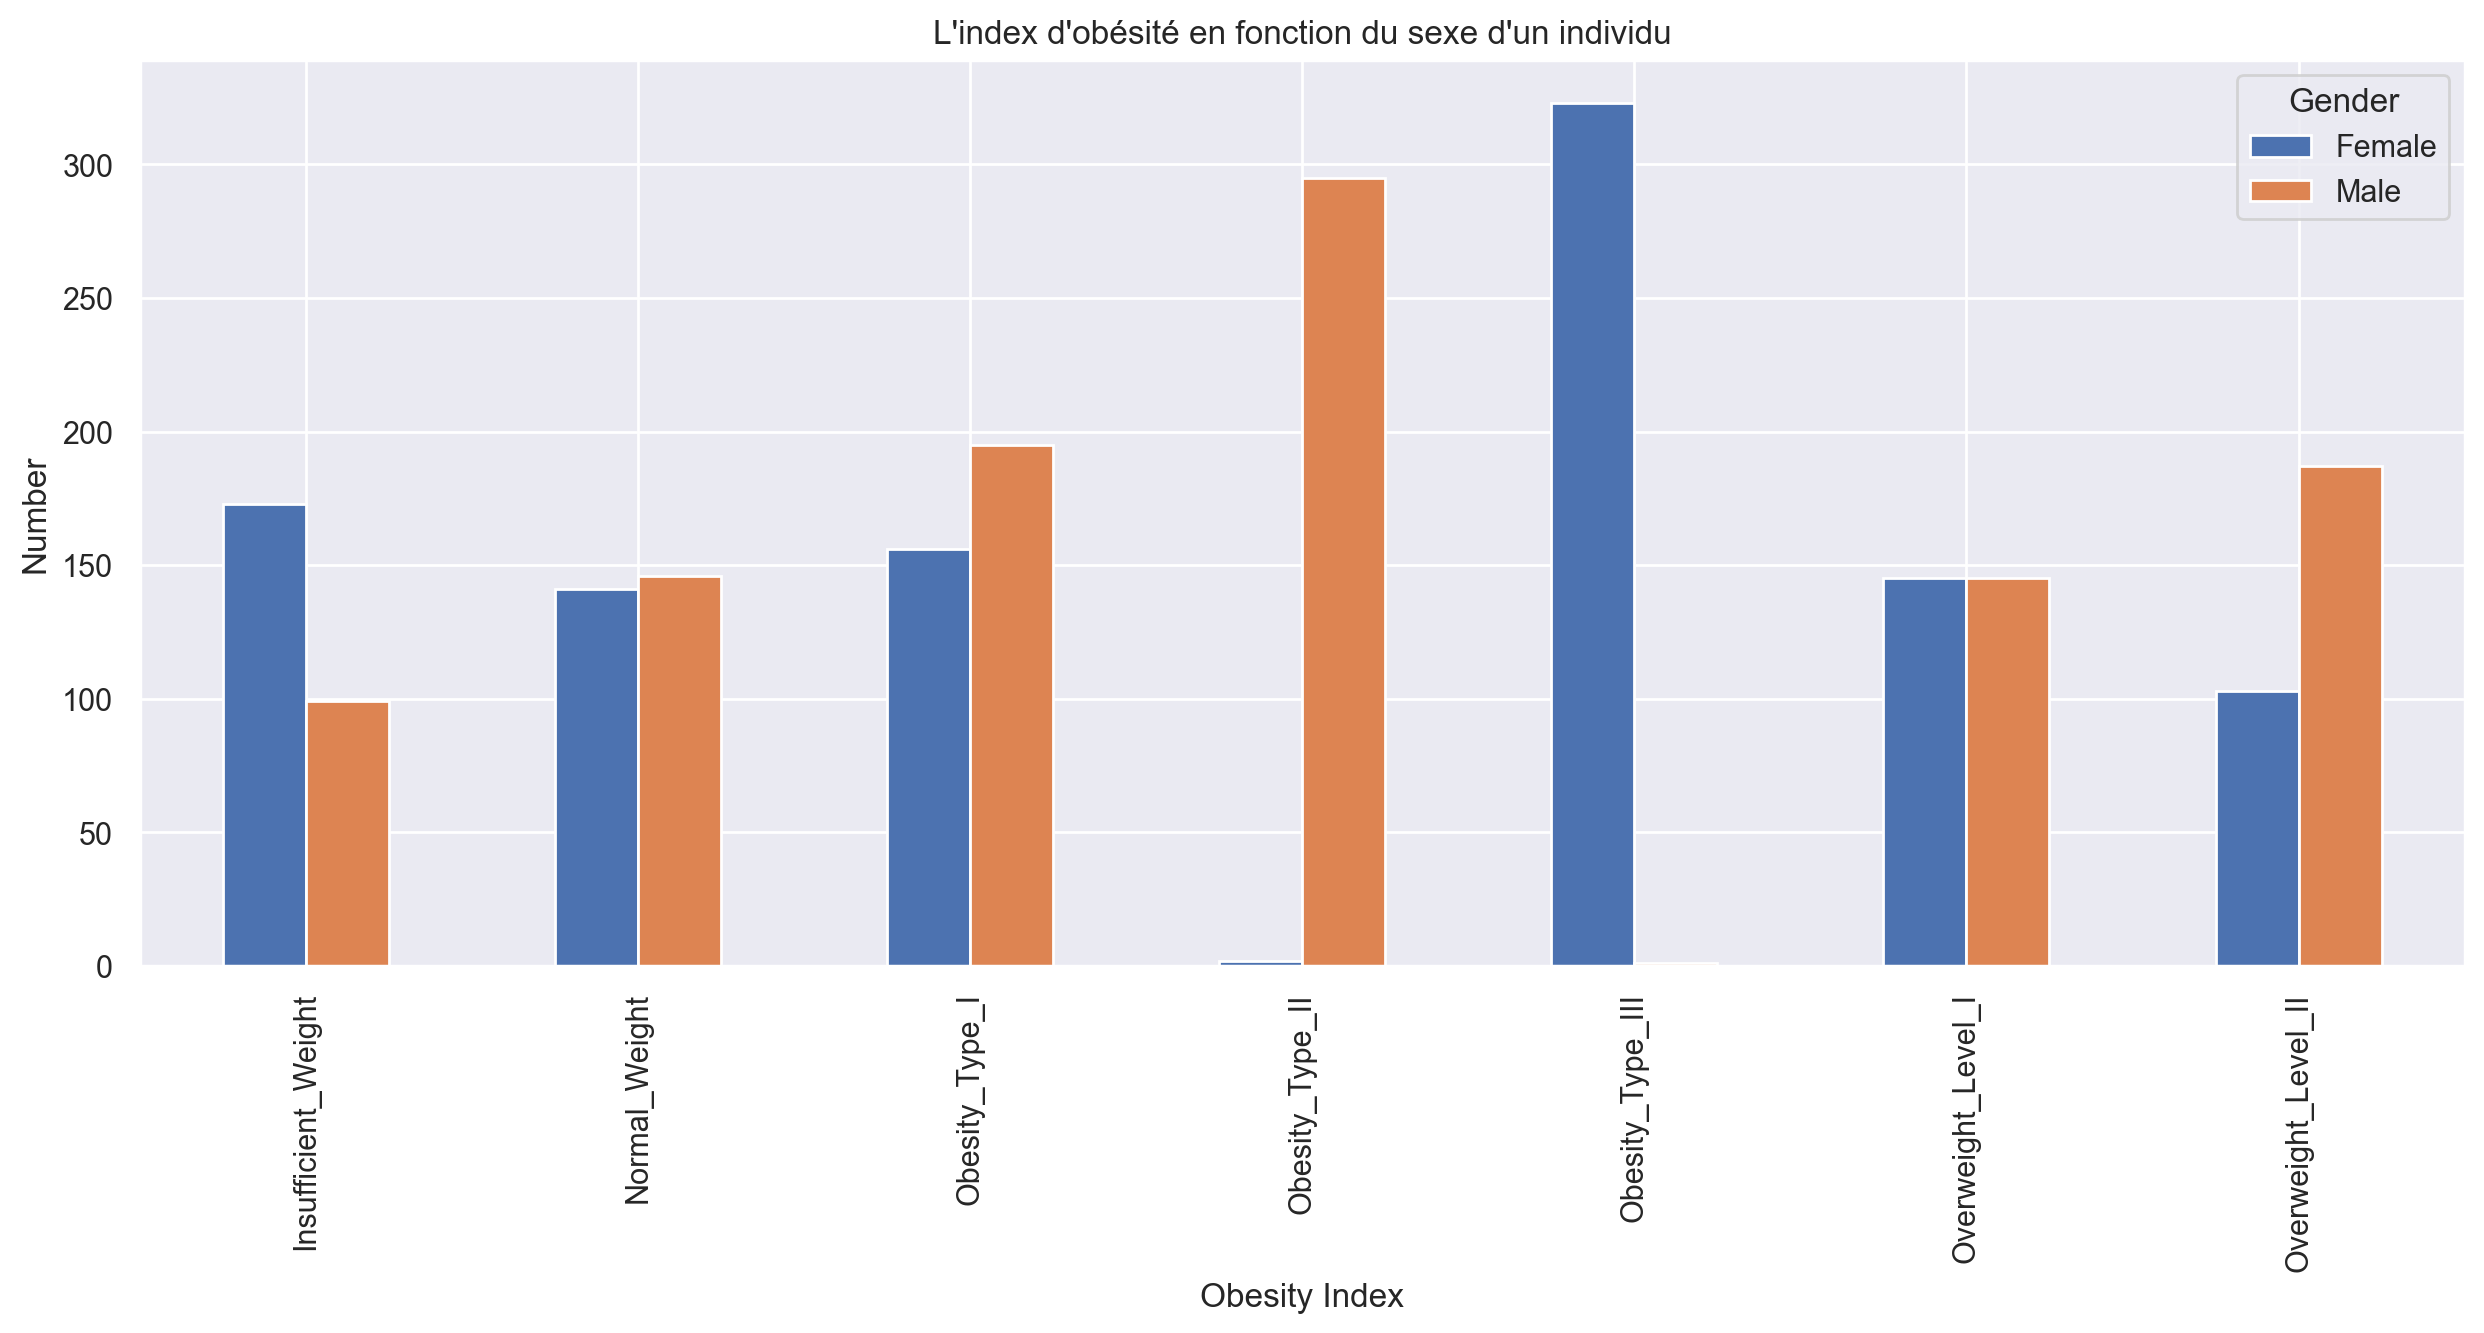

In [18]:
ObesityGender.plot(xlabel='Obesity Index', ylabel='Number', kind="bar",title="L'index d'obésité en fonction du sexe d'un individu", label=True)

<AxesSubplot:title={'center':"Antécédents familiaux avec l'obésité d'un individu et son NObesity "}, xlabel='NObesity'>

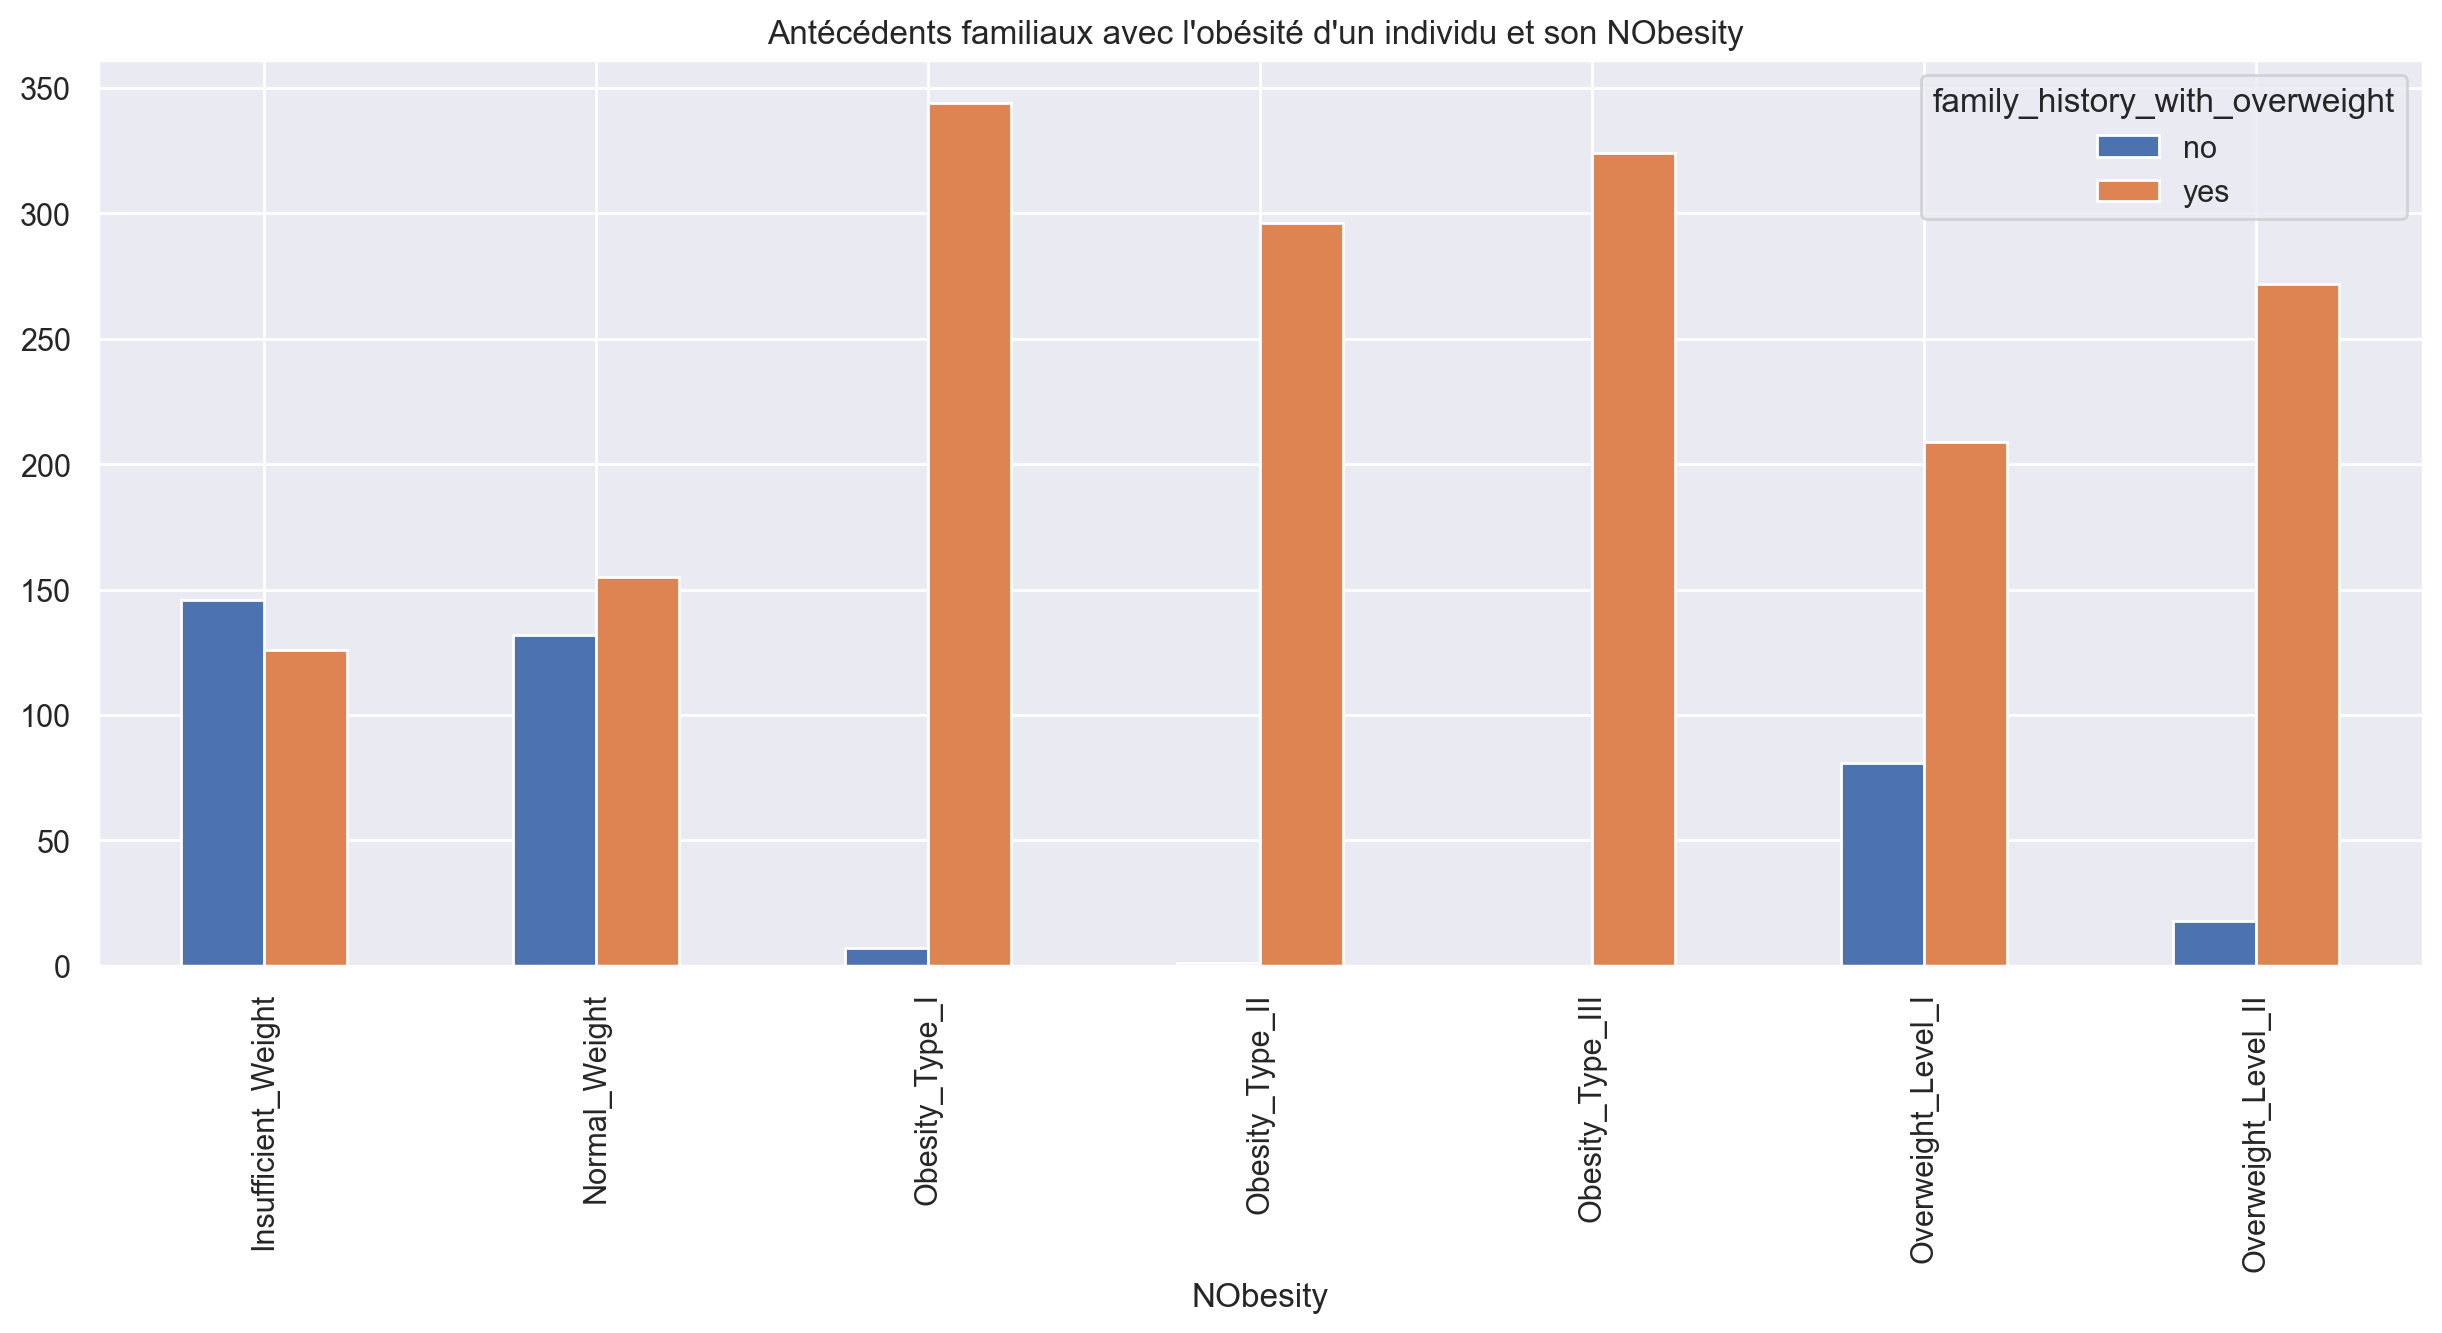

In [19]:
df_num.pivot_table('number',index="NObesity", columns="family_history_with_overweight", aggfunc=sum).plot(kind='bar',title="Antécédents familiaux avec l'obésité d'un individu et son NObesity ")

In [20]:
eating_habits = ['FAVC','FCVC','NCP','CAEC','CH2O','CALC']
physical_cond = ['SMOKE','SCC','FAF','TUE','MTRANS']

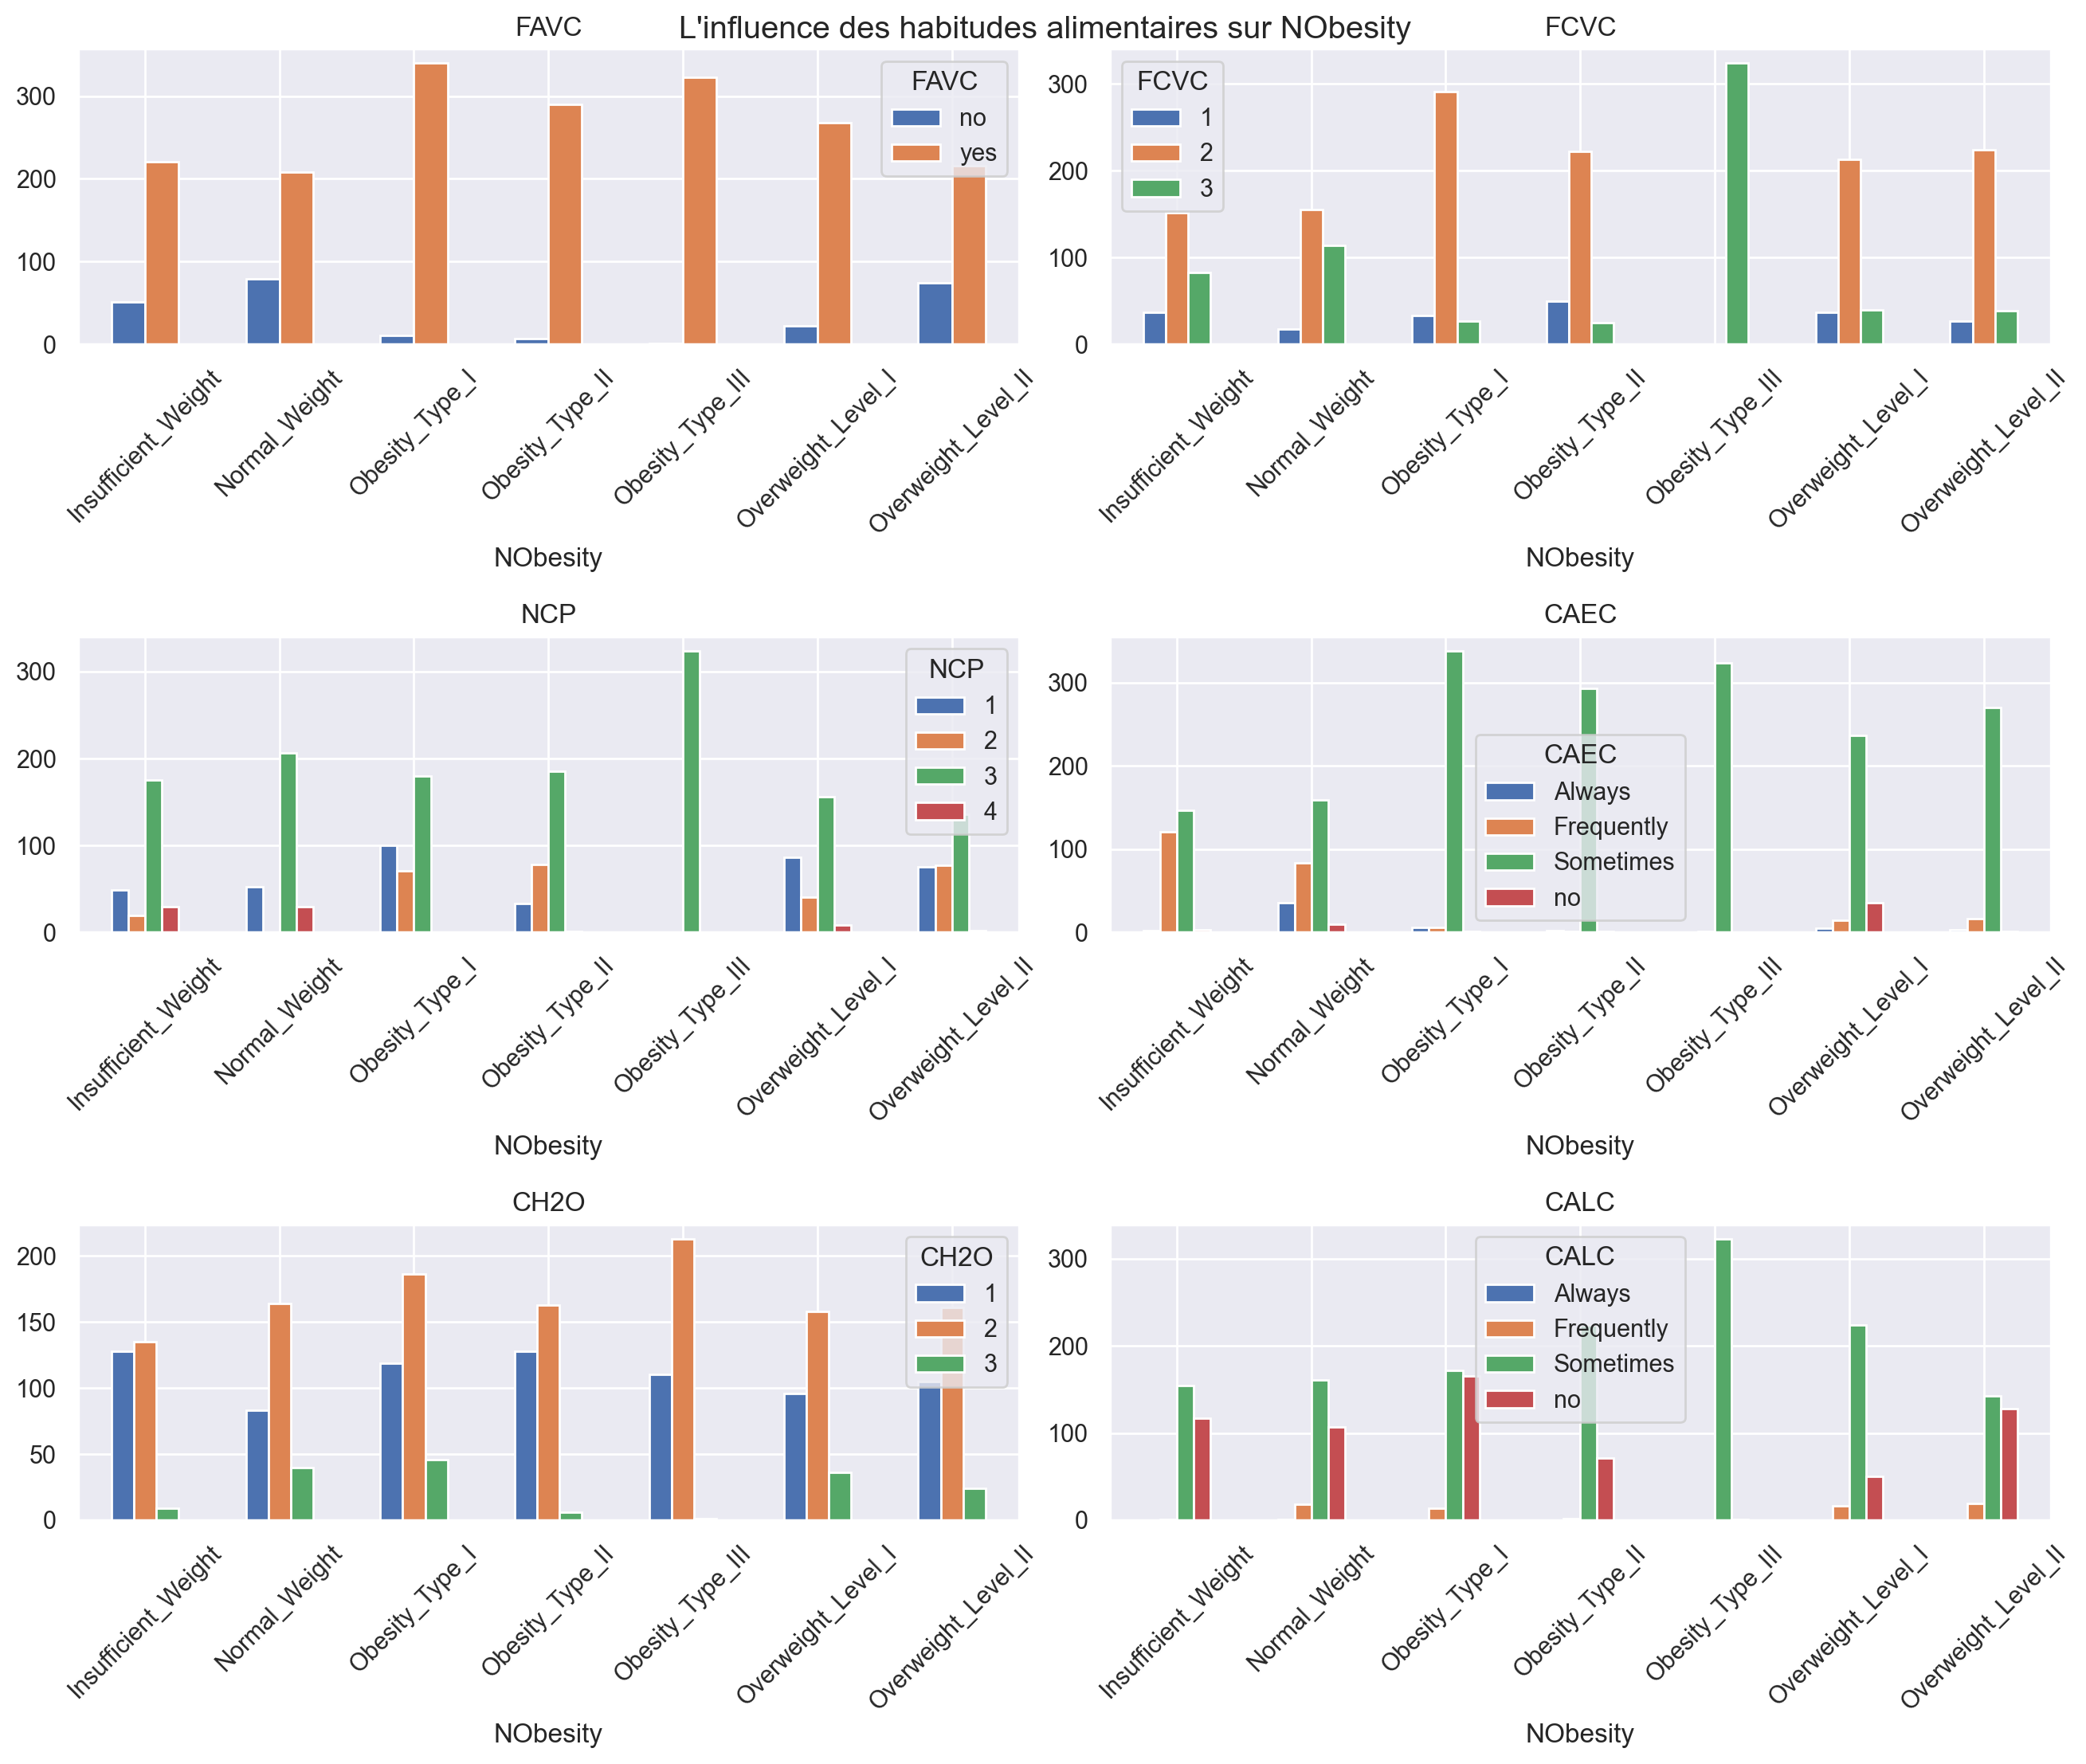

In [21]:
fig, axs = plt.subplots(3,2, figsize=(13,10))
fig.suptitle("L'influence des habitudes alimentaires sur NObesity")
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=9)
for col, ax in zip(eating_habits,axs.flatten()):
    df_num.pivot_table('number',index="NObesity", columns=col, aggfunc=sum).plot(ax=ax, kind='bar', rot=45, title=col)

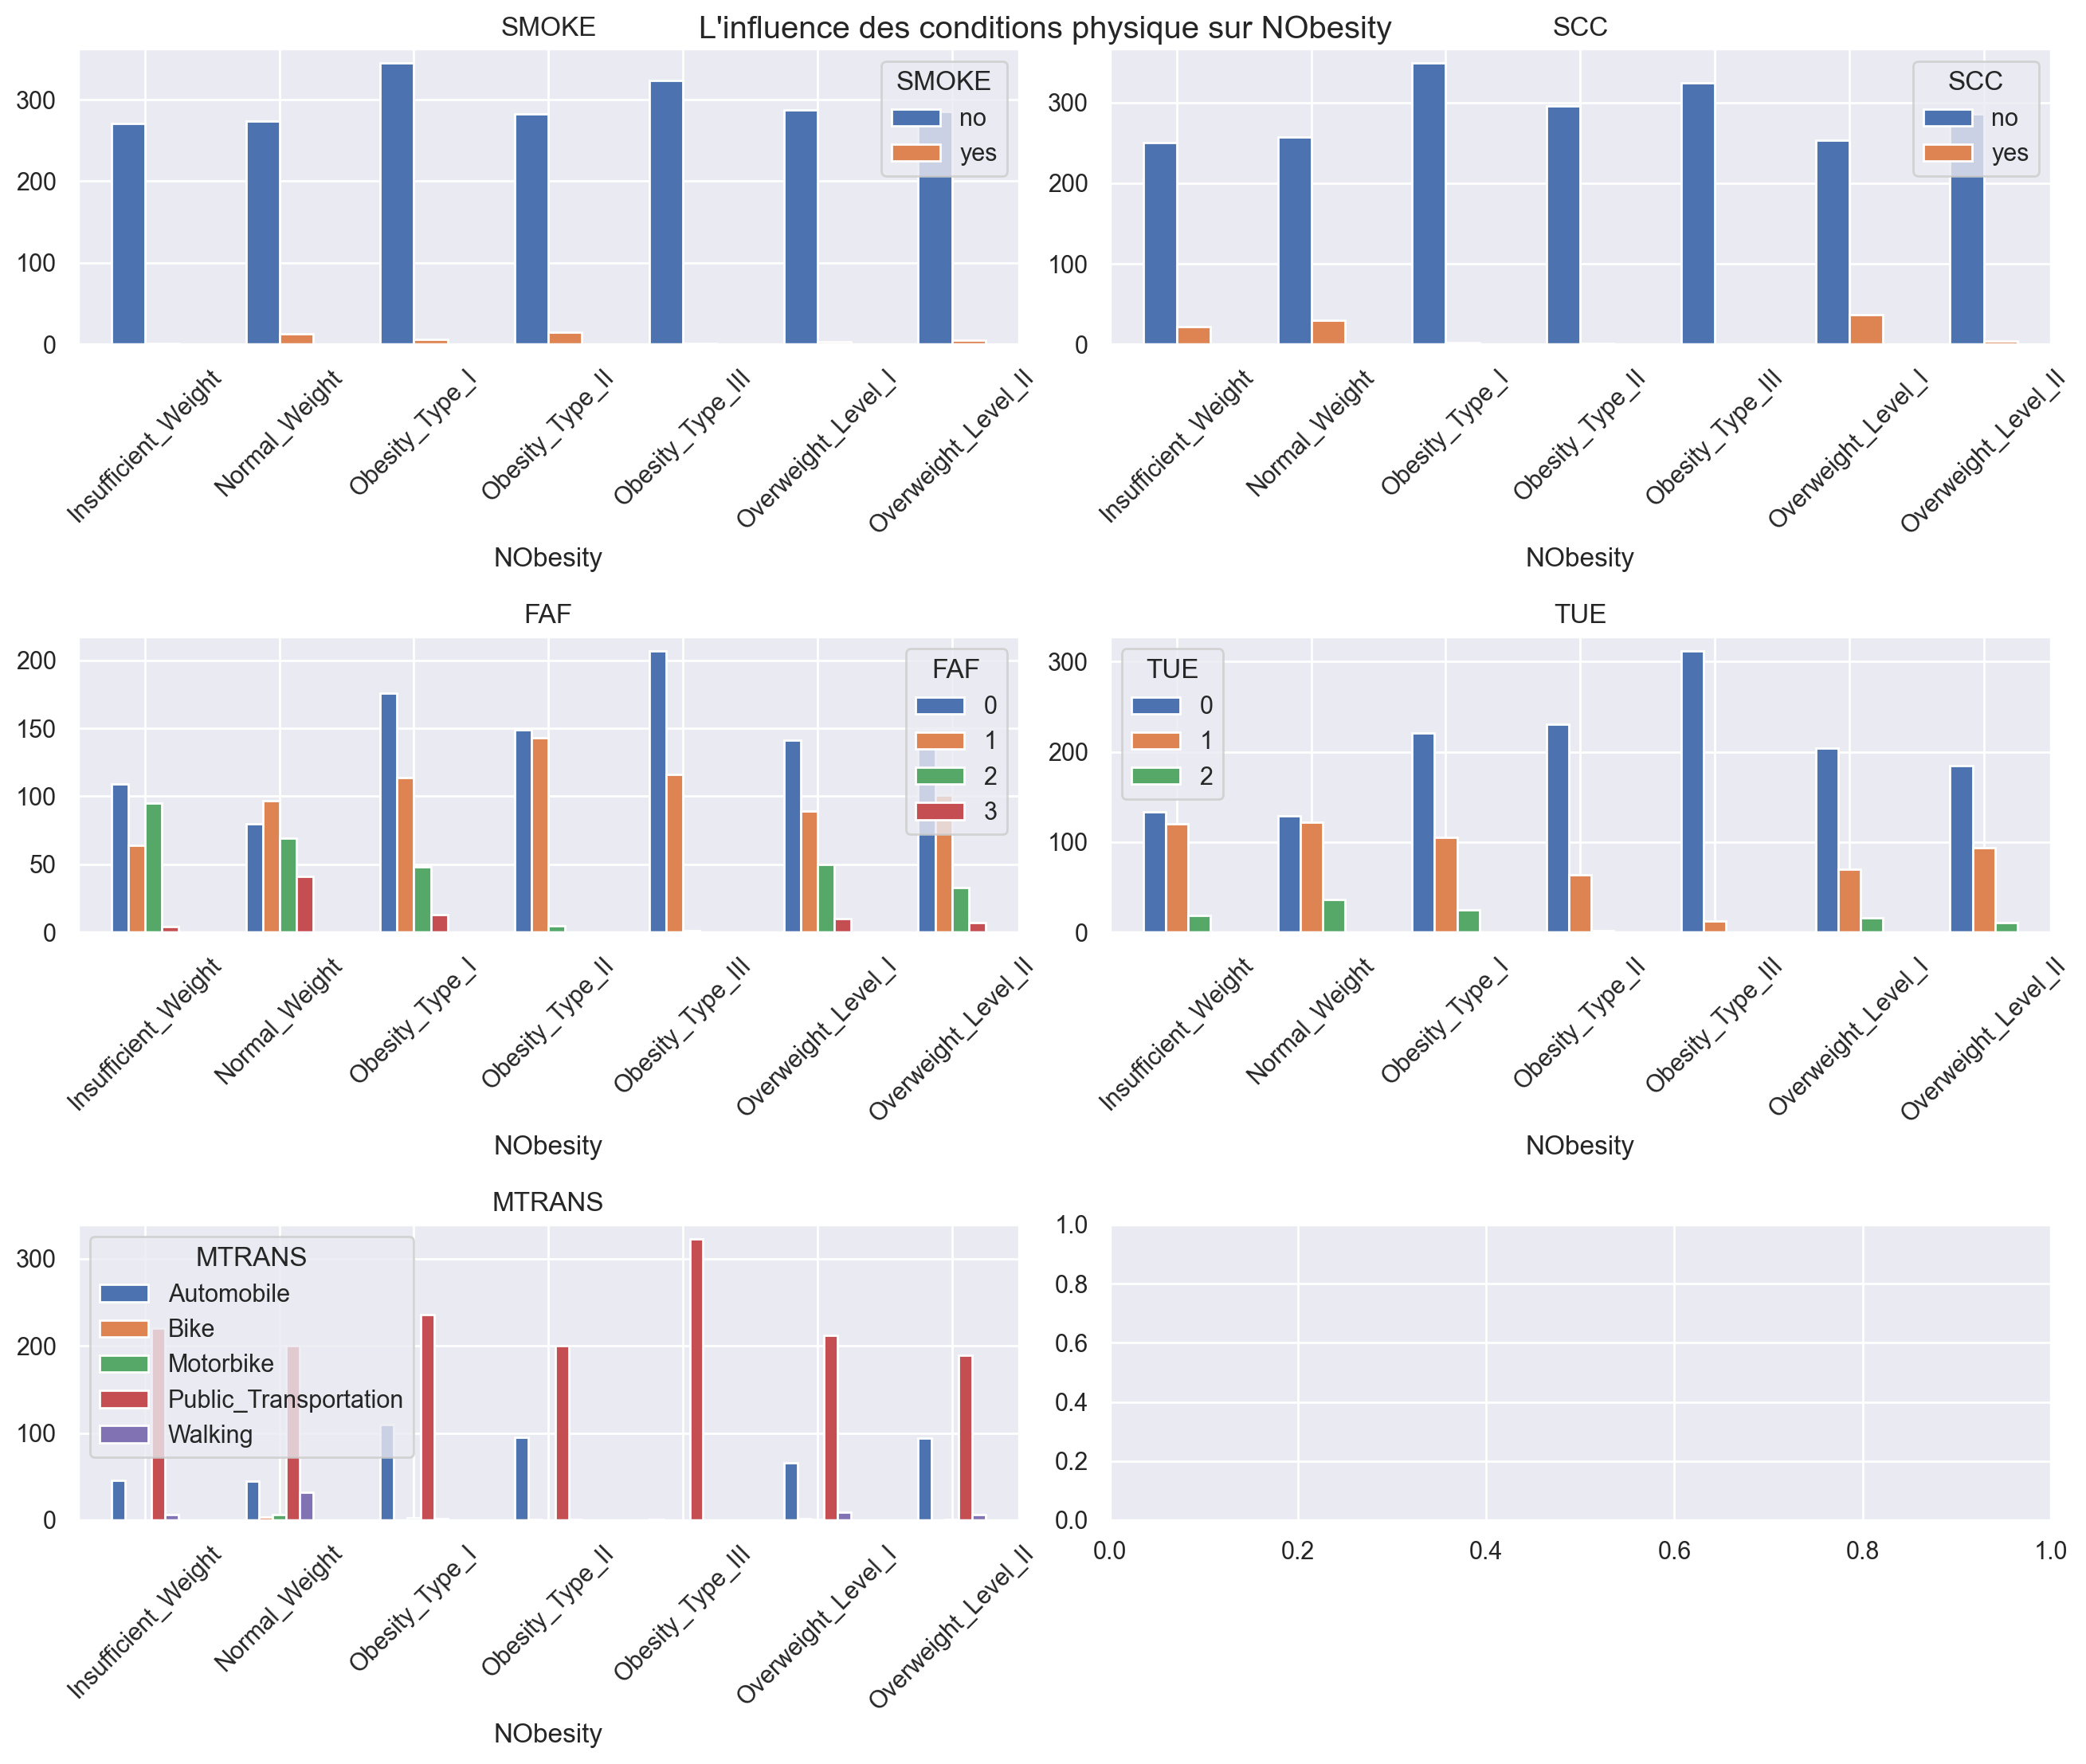

In [22]:
fig, axs = plt.subplots(3,2, figsize=(13,10))
fig.suptitle("L'influence des conditions physique sur NObesity")
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=9)
for col, ax in zip(physical_cond,axs.flatten()):
    df_num.pivot_table('number',index="NObesity", columns=col, aggfunc=sum).plot(ax=ax, kind='bar', rot=45, title=col)

Nous pouvons constater plusieurs anomalies dans nos données.
Concernant :
- Gender : 
    - Seul des *Male* ont été défini comme *Obesity_Type_II* 
    - De même seul des *Female* ont été défini comme *Obesity_Type_III*  
    
    Cela peut être expliqué si dans les données récupérées à travers le sondage, seul très peu d'hommes étaient identifiée *Obesity_Type_II* et lors de la génération de données synthétiques, aucun autre homme n'a été généré.  
    De même, pour les données *Obesity_Type_III*, seul quelques femmes peuvent avoir répondu réellement au sondage. 
   
   
- FCVC (Fréquence de consommation de légumes) :
    - *Obesity_Type_III* n'a que des individus consommant tout le temps des légumes.  
    Cela peut également être dû à la génération de données synthétiques.   
    
    
- SMOKE :  
    Presque aucun fumeur n'est présenté dans nos données. Cela peut également être dû au fait que peu de fumeur n'ai répondu au sondage, influant la génération de données synthétiques.  
    
    
- MTRANS (Moyen de transports):  
    Qui semble faire penser que la population de l'Amérique du Sud ne se déplace qu'en voiture et transport public.  Cela serait du à la même chose.

In [23]:
raw_data.groupby(["NObesity","Gender"]).NObesity.count()

NObesity             Gender
Insufficient_Weight  Female     17
                     Male       16
Normal_Weight        Female    139
                     Male      139
Obesity_Type_I       Female     19
                     Male       27
Obesity_Type_II      Female      2
                     Male        9
Obesity_Type_III     Female      2
                     Male        1
Overweight_Level_I   Female     26
                     Male       32
Overweight_Level_II  Female     20
                     Male       36
Name: NObesity, dtype: int64

On peut donc constater que c'est bien un manque d'élément pour *Obesity_Type_II* et *Obesity_Type_III* qui n'a probablement pas permi une bonne génération des données synthétiques.

In [24]:
raw_data.groupby(["NObesity","FCVC"]).NObesity.count()

NObesity             FCVC
Insufficient_Weight  1.0       3
                     2.0      11
                     3.0      19
Normal_Weight        1.0      17
                     2.0     150
                     3.0     111
Obesity_Type_I       1.0       3
                     2.0      30
                     3.0      13
Obesity_Type_II      1.0       1
                     2.0       5
                     3.0       5
Obesity_Type_III     3.0       3
Overweight_Level_I   1.0       4
                     2.0      33
                     3.0      21
Overweight_Level_II  1.0       3
                     2.0      36
                     3.0      17
Name: NObesity, dtype: int64

De plus, on voit que seul 3 personnes avec un NObesity=*Obesity_Type_III* avaient répondu au sondage. Cela a donc dû interférer avec la génération de donnée.

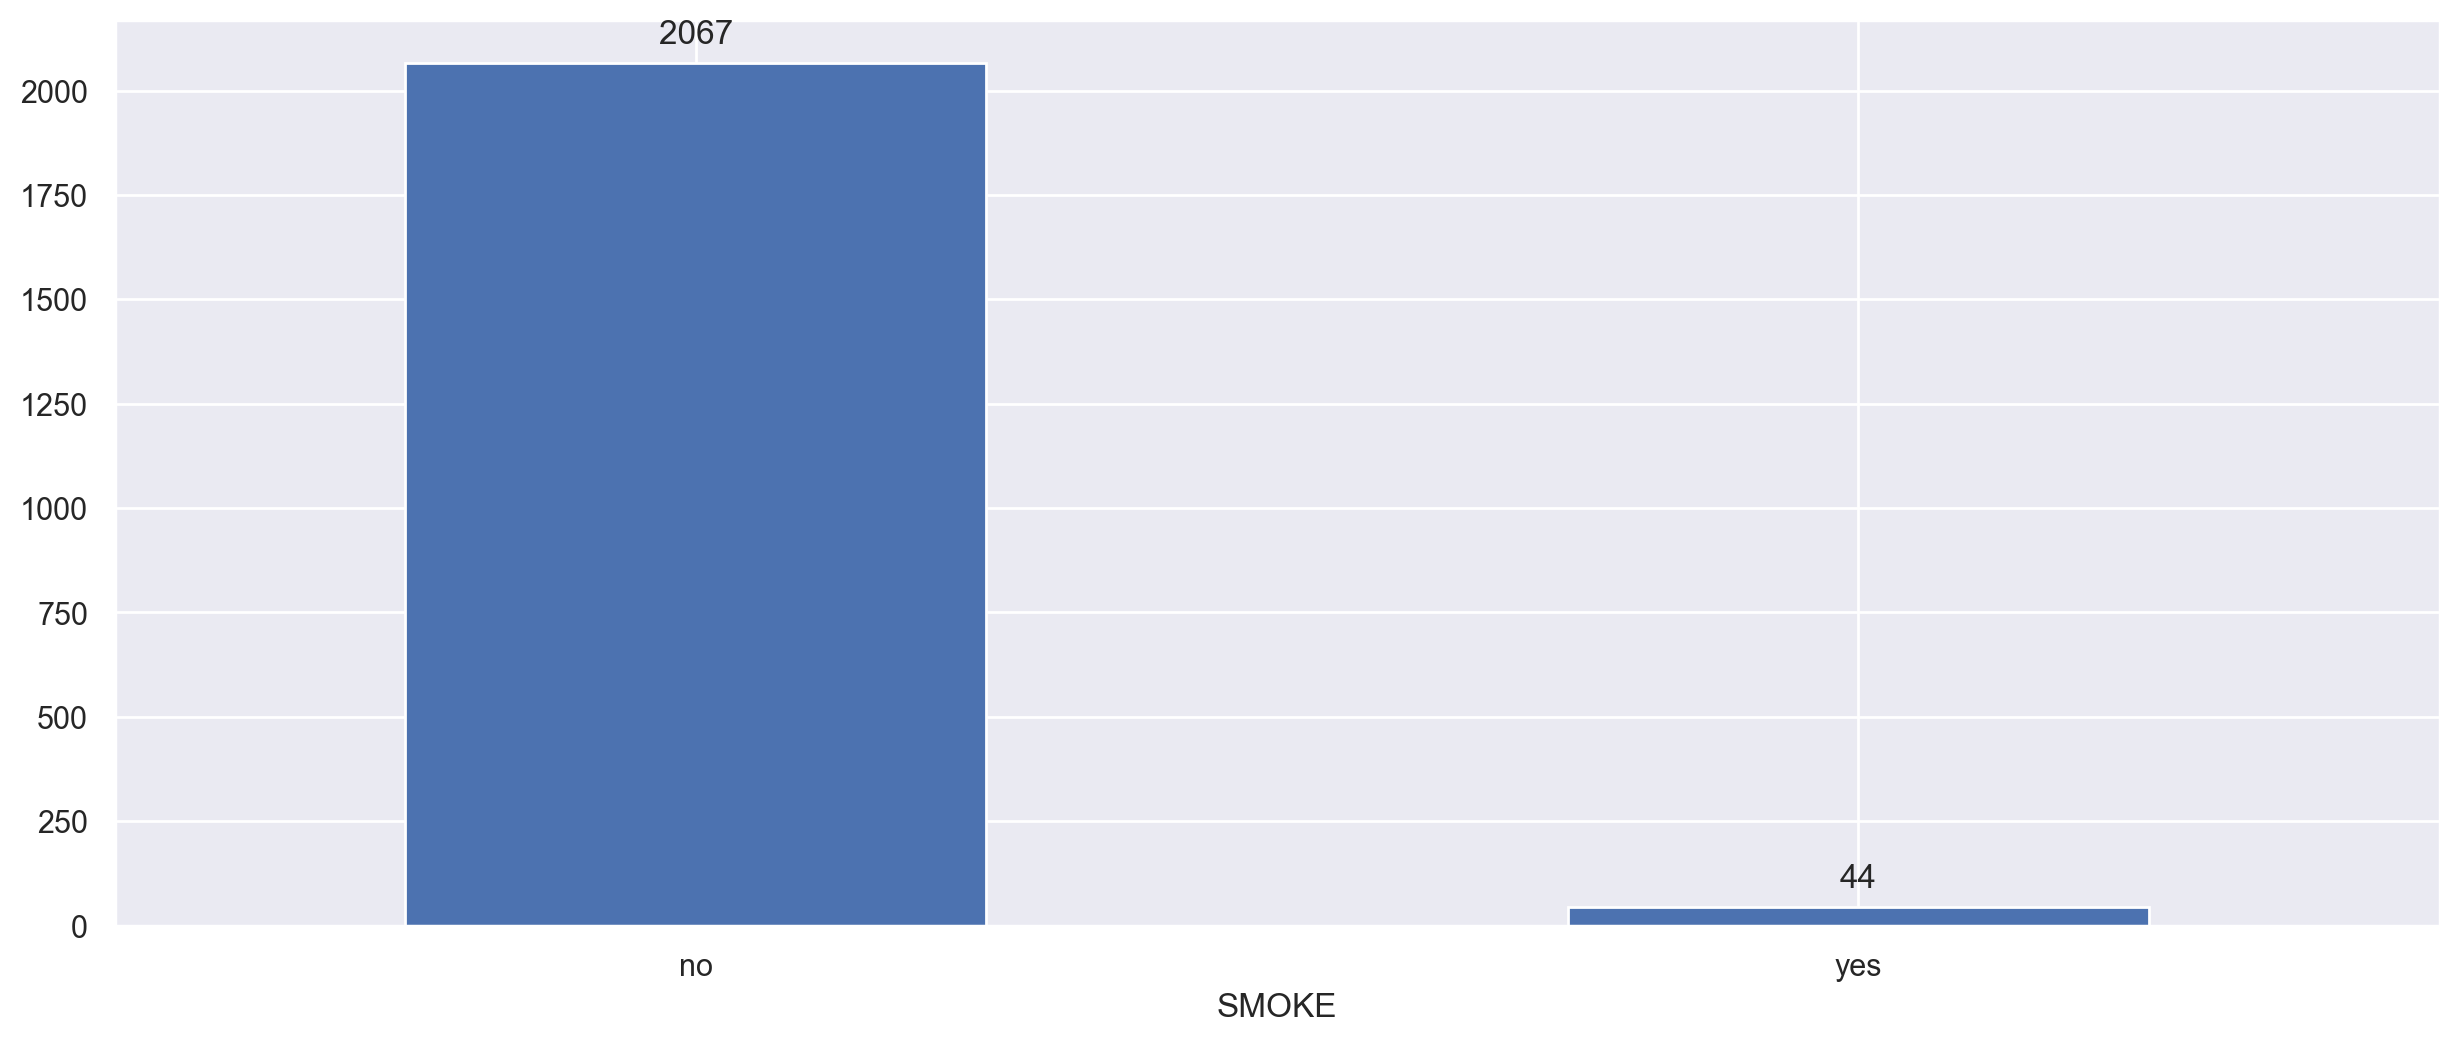

In [25]:
ax = df.groupby(["SMOKE"]).NObesity.count().plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+p.get_width()/2., p.get_height()), ha='center',va='center',xytext=(0, 10),textcoords='offset points')

Sachant qu'environ 16% de la population en Amérique du Sud est fumeur, seulement 44 instances fumeur dans les données parait très faible. En effet 16% de nos données aurait du plutôt être de l'ordre de 337 fumeurs.

In [26]:
raw_data.groupby(["NObesity","MTRANS"]).NObesity.count()

NObesity             MTRANS               
Insufficient_Weight  Automobile                 3
                     Public_Transportation     24
                     Walking                    6
Normal_Weight        Automobile                45
                     Bike                       4
                     Motorbike                  4
                     Public_Transportation    194
                     Walking                   31
Obesity_Type_I       Automobile                15
                     Motorbike                  2
                     Public_Transportation     27
                     Walking                    2
Obesity_Type_II      Automobile                 3
                     Bike                       1
                     Public_Transportation      6
                     Walking                    1
Obesity_Type_III     Automobile                 1
                     Public_Transportation      2
Overweight_Level_I   Automobile                12
       

Cela nous montre bien que pas assez d'individus n'aient répondu au questionnaire afin que les données générées représentent la population entière d'Amérique du Sud.  
Ce ne sont pas les 4 seules variables qui présentes des anomalies mais toutes les évoquer serait très chronophage, et nous ne nous attarderons donc pas dessus.

Nous tiendrons donc en compte le fait que plus de 70% des données on été généré synthétiquement, ce qui pourrait fortement influer sur la précision du modèle de prédiction de *NObesity*.

Toutes les variables, excepté *'Age'*, *'Height'* et *'Weight'*, sont qualitatives. 
Dont beaucoup sont nominales et doivent donc être traitées pour pouvoir être utilisées.  

Les variables *family_history_with_overweight*, *FAVC*, *SMOKE* et *SCC* sont binaires.

### Codage/Encoding des variables qualitatives

Les changements afin de pouvoir les utiliser :

Attribut | Modifications | Signification
:------: | :------: | :------:
Gender   | 0, 1| 0:"Female",1:"Male"  
Family history w/ overweight | 0, 1 | 1:"yes",0:"no"
Frequent consumption of high caloric food (FAVC) | 0, 1 | 1:"yes",0:"no"
Consumption of food between meals (CAEC)| 0, 1 , 2, 3| 0:"No",1:"Sometimes",2:"Frequently",3:"Always"
Smoke | 0, 1 | 1:"yes",0:"no"
Calories consumption monitoring (SCC)| 0, 1 | 1:"yes",0:"no" 
Consumption of alcohol (CALC)|  0, 1 , 2, 3| 0:"No",1:"Sometimes",2:"Frequently",3:"Always"
Transportation used (MTRANS) | 1, 2, 3, 4, 5 |1:"Automobile",2:"Bike",3:"Motorbike",4:"Public_Transportation",5:"Walking"
NObesity | 0, 1, 2, 3, 4, 5, 6 |0:"Insufficient Weight", 1:"Normal Weight", 2:"Overweight Level I", 3:"Overweight Level II", 4:"Obesity Type I", 5:"Obesity Type II", 6:"Obesity Type III"

In [27]:
df['Gender'] = df['Gender'].apply(lambda x: 0 if x=='Female' else 1)
df['family_history_with_overweight'] = df['family_history_with_overweight'].apply(lambda x: 0 if x=='no' else 1)
df['FAVC'] = df['FAVC'].apply(lambda x: 0 if x=='no' else 1)

df['CAEC'] = (
    np.select(
        condlist=[df['CAEC'] =='No', df['CAEC'] =='Sometimes',df['CAEC'] =='Frequently'], 
        choicelist=[0, 1, 2], 
        default=3))

df['SMOKE'] = df['SMOKE'].apply(lambda x: 0 if x=='no' else 1)
df['SCC'] = df['SCC'].apply(lambda x: 0 if x=='no' else 1)
df['CALC'] = (
    np.select(
        condlist=[df['CALC'] =='No', df['CALC'] =='Sometimes',df['CALC'] =='Frequently'], 
        choicelist=[0, 1, 2], 
        default=3))

df['MTRANS'] = (
    np.select(
        condlist=[df['MTRANS'] =='Automobile', df['MTRANS'] =='Bike',df['MTRANS'] =='Motorbike', df['MTRANS']=='Public_Transportation'], 
        choicelist=[1, 2, 3, 4], 
        default=5))

df['NObesity'] = (
    np.select(
        condlist=[df['NObesity'] =='Insufficient_Weight', df['NObesity'] =='Normal_Weight',
                  df['NObesity'] =='Overweight_Level_I', df['NObesity'] =='Overweight_Level_II', 
                  df['NObesity'] =='Obesity_Type_I',df['NObesity'] =='Obesity_Type_II'],
        choicelist=[0, 1, 2, 3, 4, 5], 
        default=6))

In [28]:
df

Gender  Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0          0   21    1.62    64.0                               1     0     2   
1          0   21    1.52    56.0                               1     0     3   
2          1   23    1.80    77.0                               1     0     2   
3          1   27    1.80    87.0                               0     0     3   
4          1   22    1.78    89.8                               0     0     2   
...      ...  ...     ...     ...                             ...   ...   ...   
2106       0   20    1.71   131.4                               1     1     3   
2107       0   21    1.75   133.7                               1     1     3   
2108       0   22    1.75   133.7                               1     1     3   
2109       0   24    1.74   133.3                               1     1     3   
2110       0   23    1.74   133.5                               1     1     3   

      NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS  NObesity  
0       3     1      0     2    0    0    1     3       4         1  
1       3     1      1     3    1    3    0     1       4         1  
2       3     1      0     2    0    2    1     2       4         1  
3       3     1      0     2    0    2    0     2       5         2  
4       1     1      0     2    0    0    0     1       4         3  
...   ...   ...    ...   ...  ...  ...  ...   ...     ...       ...  
2106    3     1      0     1    0    1    0     1       4         6  
2107    3     1      0     2    0    1    0     1       4         6  
2108    3     1      0     2    0    1    0     1       4         6  
2109    3     1      0     2    0    1    0     1       4         6  
2110    3     1      0     2    0    1    0     1       4         6  

[2111 rows x 17 columns]

## Correlation 

Nous allons voir ici le lien entre les différentes variables.

In [29]:
warnings.filterwarnings('ignore')
warnings.simplefilter("ignore")
sns.pairplot(df, hue='NObesity')

<AxesSubplot:>

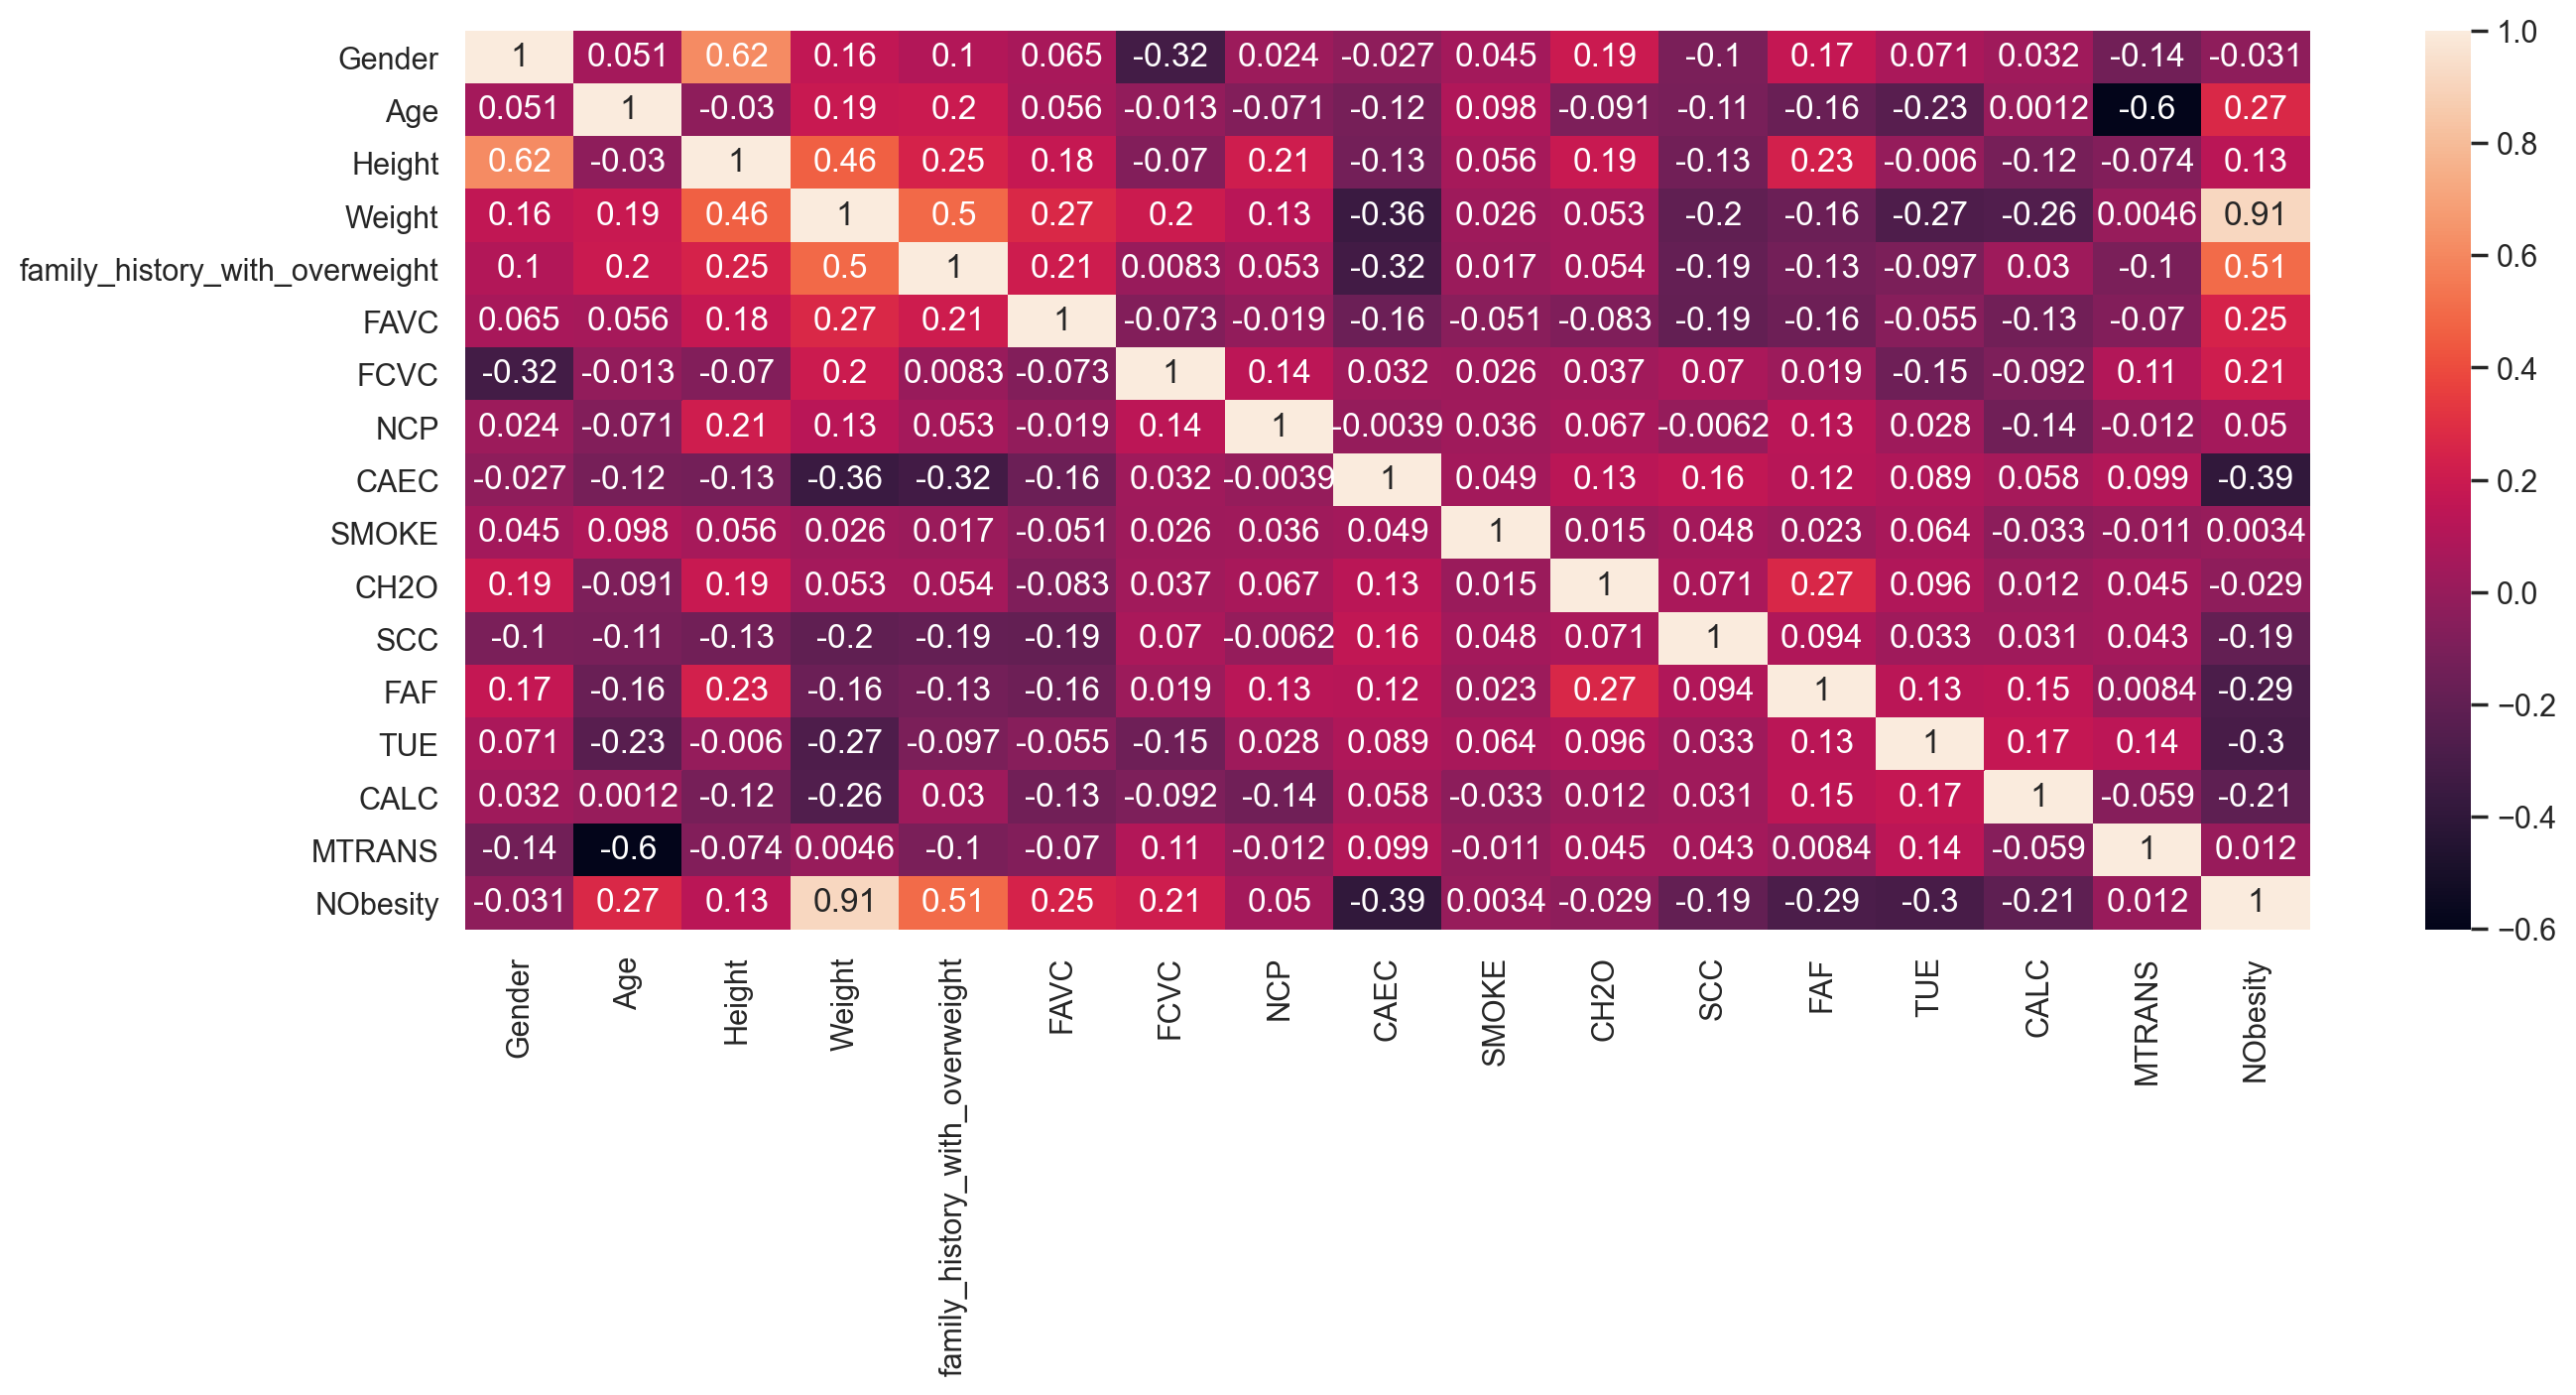

In [30]:
sns.heatmap(df.corr(), annot=True)

Pour les variables qualitatives le calcul de correlation ne donnera pas le résultat escompté. On peut donc essayer de mesurer leur association.  
Pour cela, nous allons utiliser la méthode Cramer's V.

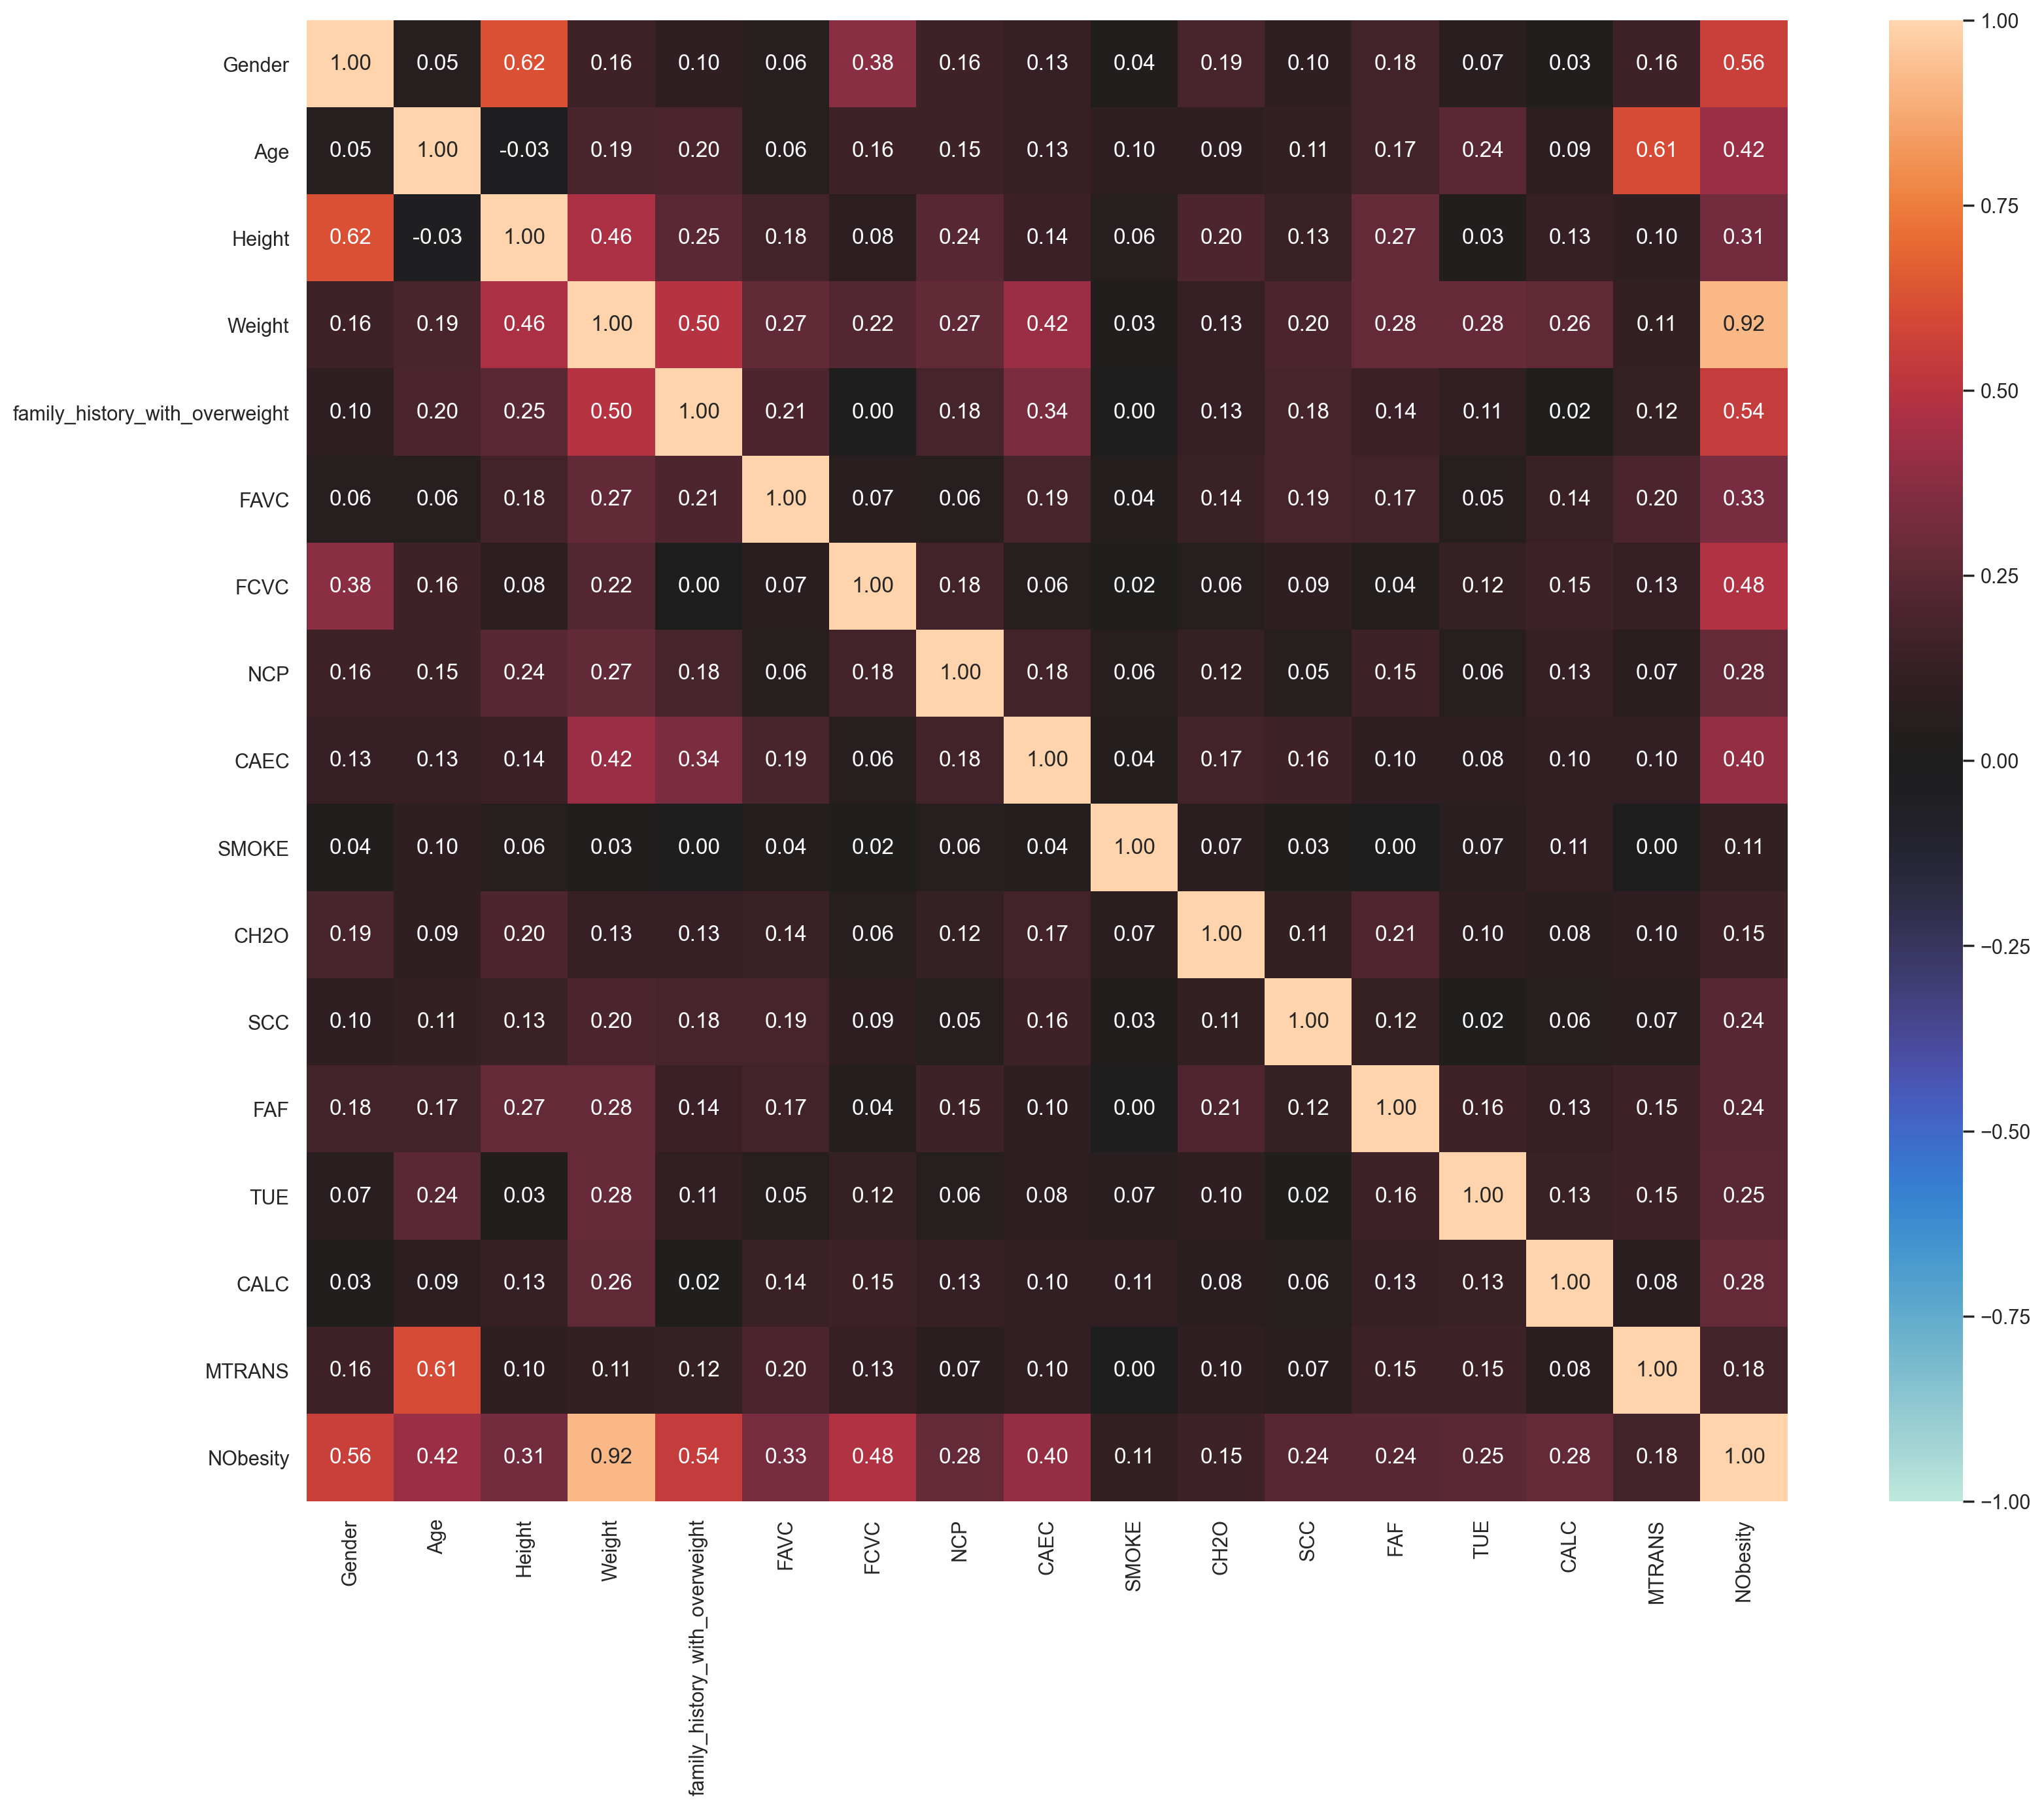

{'corr':                                   Gender       Age    Height    Weight  \
 Gender                          1.000000  0.050677  0.618145  0.161681   
 Age                             0.050677  1.000000 -0.030282  0.190253   
 Height                          0.618145 -0.030282  1.000000  0.462283   
 Weight                          0.161681  0.190253  0.462283  1.000000   
 family_history_with_overweight  0.098942  0.195552  0.247245  0.496816   
 FAVC                            0.059618  0.055872  0.177721  0.272303   
 FCVC                            0.379316  0.159197  0.081499  0.221878   
 NCP                             0.159897  0.148472  0.236445  0.272684   
 CAEC                            0.128889  0.131851  0.142583  0.419265   
 SMOKE                           0.035201  0.097897  0.055725  0.025772   
 CH2O                            0.192473  0.094883  0.203157  0.127634   
 SCC                             0.097993  0.111882  0.133369  0.201904   
 FAF             

In [31]:
nominal.associations(df, nominal_columns=categoricals ,  figsize = (20,15))

*Weight* est fortement corrélé à *NObesity*, ce qui est cohérent puisque NObesity est déterminé par l'IMC se calculant grâce au poid.  
*SMOKE*, *MTRANS* et *CH2O* semblent avoir une très faible relation avec *NObesity*.
Concernant *SMOKE*, cela coïncide avec la supposition faite précédemment. Il est possible que cette variable ne soit pas utilisée dans les prochains modèles de prédictions.

### TEST CATEGORICAL

In [32]:
df_test = data.astype({"Age":'int', "FCVC":'int', "NCP":'int', "CH2O":'int', "FAF":'int', "TUE":'int'})
df_test = df_test.round({"Height":2, "Weight":1})

In [33]:
df_test

Gender  Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0     Female   21    1.62    64.0                            yes   no     2   
1     Female   21    1.52    56.0                            yes   no     3   
2       Male   23    1.80    77.0                            yes   no     2   
3       Male   27    1.80    87.0                             no   no     3   
4       Male   22    1.78    89.8                             no   no     2   
...      ...  ...     ...     ...                            ...  ...   ...   
2106  Female   20    1.71   131.4                            yes  yes     3   
2107  Female   21    1.75   133.7                            yes  yes     3   
2108  Female   22    1.75   133.7                            yes  yes     3   
2109  Female   24    1.74   133.3                            yes  yes     3   
2110  Female   23    1.74   133.5                            yes  yes     3   

      NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0       3  Sometimes    no     2   no    0    1          no   
1       3  Sometimes   yes     3  yes    3    0   Sometimes   
2       3  Sometimes    no     2   no    2    1  Frequently   
3       3  Sometimes    no     2   no    2    0  Frequently   
4       1  Sometimes    no     2   no    0    0   Sometimes   
...   ...        ...   ...   ...  ...  ...  ...         ...   
2106    3  Sometimes    no     1   no    1    0   Sometimes   
2107    3  Sometimes    no     2   no    1    0   Sometimes   
2108    3  Sometimes    no     2   no    1    0   Sometimes   
2109    3  Sometimes    no     2   no    1    0   Sometimes   
2110    3  Sometimes    no     2   no    1    0   Sometimes   

                     MTRANS             NObesity  
0     Public_Transportation        Normal_Weight  
1     Public_Transportation        Normal_Weight  
2     Public_Transportation        Normal_Weight  
3                   Walking   Overweight_Level_I  
4     Public_Transportation  Overweight_Level_II  
...                     ...                  ...  
2106  Public_Transportation     Obesity_Type_III  
2107  Public_Transportation     Obesity_Type_III  
2108  Public_Transportation     Obesity_Type_III  
2109  Public_Transportation     Obesity_Type_III  
2110  Public_Transportation     Obesity_Type_III  

[2111 rows x 17 columns]

In [34]:
df_test[categoricals] = df_test[categoricals].astype('category')
df_test.dtypes

Gender                            category
Age                                  int32
Height                             float64
Weight                             float64
family_history_with_overweight    category
FAVC                              category
FCVC                              category
NCP                               category
CAEC                              category
SMOKE                             category
CH2O                              category
SCC                               category
FAF                               category
TUE                               category
CALC                              category
MTRANS                            category
NObesity                          category
dtype: object

### FIN TEST

## Modélisation

Puisque la valeur que l'on souhaite prédire *NObesity* est une valeur discrète, nous avons un problème de classification.
Output variable y=NObesity

Nous allons créer plusieurs modèles de manière différente afin de trouver la meilleure méthode de prédiction.
J'ai choisi d'utiliser :  
- Naive Bayes Classification
- Decision Tree
- Random Forest
- Ada Boost
- Multi-layer Perceptron  

Avant tout, nous allons séparer les données en *training set* et *testing set* afin de pouvoir évaluer les différents modèles. 

## Training & testing set

In [35]:
X = df.drop(columns=['Weight','Height','NObesity'])
y = df['NObesity']
X, y

(      Gender  Age  family_history_with_overweight  FAVC  FCVC  NCP  CAEC  \
 0          0   21                               1     0     2    3     1   
 1          0   21                               1     0     3    3     1   
 2          1   23                               1     0     2    3     1   
 3          1   27                               0     0     3    3     1   
 4          1   22                               0     0     2    1     1   
 ...      ...  ...                             ...   ...   ...  ...   ...   
 2106       0   20                               1     1     3    3     1   
 2107       0   21                               1     1     3    3     1   
 2108       0   22                               1     1     3    3     1   
 2109       0   24                               1     1     3    3     1   
 2110       0   23                               1     1     3    3     1   
 
       SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS  
 0         0     2    0 

In [36]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,random_state=1, test_size=0.2)

In [97]:
def evaluate(name, y_pred, y_test):
    errors = abs(y_pred - y_test)
    accuracy = accuracy_score(y_test, y_pred)*100
    print('Performance de {}'.format(name))
    print('Erreur moyenne: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.4f}%.'.format(accuracy))
    return accuracy

### Naive Bayes Classification

In [38]:
model_NB = GaussianNB()                       
model_NB.fit(Xtrain, ytrain)                 
y_pred_NB = model_NB.predict(Xtest)

In [98]:
acc_NB = evaluate('Naive Bayes',y_pred_NB,ytest)

Performance de Naive Bayes
Erreur moyenne: 0.9102 degrees.
Accuracy = 52.4823%.


### Decision Tree

In [40]:
model_DT = DecisionTreeClassifier()                       
model_DT.fit(Xtrain, ytrain)                 
y_pred_DT = model_DT.predict(Xtest)

In [99]:
acc_DT = evaluate('Decision Tree',y_pred_DT,ytest)

Performance de Decision Tree
Erreur moyenne: 0.4232 degrees.
Accuracy = 76.5957%.


#### GridSearch
Recherche des hyperparamètres les plus adaptés avec GridSearch.

In [42]:
tree_para = {'class_weight':['balanced',None],
             'criterion':['gini','entropy'],
             'max_depth':[1,3,5,10,None],
             'max_features':['auto','sqrt','log2',None],
             'min_samples_split':[1,2,3,5,10],              
             'splitter':['best','random']}

In [43]:
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_para)
grid_tree.fit(Xtrain, ytrain)
print(grid_tree.best_score_)
grid_tree.best_params_

0.7713008972310502


{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'min_samples_split': 2,
 'splitter': 'best'}

In [100]:
grid_tree_pred = grid_tree.best_estimator_.predict(Xtest)
acc_DTGS = evaluate('Decision Tree GridSearch Best',grid_tree_pred,ytest)

Performance de Decision Tree GridSearch Best
Erreur moyenne: 0.4374 degrees.
Accuracy = 75.4137%.


### Random Forest

In [45]:
model_RF = RandomForestClassifier()                       
model_RF.fit(Xtrain, ytrain)                 
y_pred_RF = model_RF.predict(Xtest)

In [101]:
acc_RF = evaluate('Random Forest', y_pred_RF,ytest)

Performance de Random Forest
Erreur moyenne: 0.3310 degrees.
Accuracy = 81.0875%.


#### GridSearch

In [47]:
forest_param = {'n_estimators': [5, 10, 30, 50, 100, 200, 500],
                'max_features': ['auto', 'sqrt', 'log2', None],
                'max_depth' : [1,3,4,5,6,7,8,None],
                'criterion' :['gini', 'entropy']}

In [48]:
grid_forest = GridSearchCV(RandomForestClassifier(), forest_param)
grid_forest.fit(Xtrain, ytrain)
print(grid_forest.best_score_)
grid_forest.best_params_

0.813962390040911


{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'log2',
 'n_estimators': 500}

In [102]:
grid_forest_pred = grid_forest.best_estimator_.predict(Xtest)
acc_RFGS = evaluate('Decision Tree GridSearch Best',grid_forest_pred,ytest)

Performance de Decision Tree GridSearch Best
Erreur moyenne: 0.3357 degrees.
Accuracy = 81.7967%.


### Ada Boost

In [50]:
model_AB = AdaBoostClassifier()                       
model_AB.fit(Xtrain, ytrain)                 
y_pred_AB = model_AB.predict(Xtest)

In [103]:
acc_AB = evaluate('Ada Boost', y_pred_AB, ytest)

Performance de Ada Boost
Erreur moyenne: 1.4539 degrees.
Accuracy = 28.6052%.


#### GridSearch

In [68]:
ada_param = {'n_estimators':[50,100,200,500,1000,2000],
             'learning_rate':[.001,0.01,.1],
             'algorithm':['SAMME', 'SAMME.R'], 
             'random_state':[0,1,3,None]}

In [69]:
grid_ada = GridSearchCV(AdaBoostClassifier(), ada_param)
grid_ada.fit(Xtrain, ytrain)
print(grid_ada.best_score_)
grid_ada.best_params_

0.5041086509929239


{'algorithm': 'SAMME',
 'learning_rate': 0.1,
 'n_estimators': 1000,
 'random_state': 0}

In [104]:
grid_ada_pred = grid_ada.best_estimator_.predict(Xtest)
acc_ABGS = evaluate('Ada Boost GridSearch Best',grid_ada_pred,ytest)

Performance de Ada Boost GridSearch Best
Erreur moyenne: 1.0875 degrees.
Accuracy = 47.7541%.


### Multi-layer Perceptron

In [55]:
model_MLP = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(1000,), random_state=1)
model_MLP.fit(Xtrain, ytrain)
y_pred_MLP = model_MLP.predict(Xtest)

In [105]:
acc_MLP = evaluate('Multi-layer Perceptron', y_pred_MLP, ytest)

Performance de Multi-layer Perceptron
Erreur moyenne: 0.5035 degrees.
Accuracy = 70.6856%.


#### GridSearch

In [60]:
ml_param = {'hidden_layer_sizes':[(100,),(1000,)],
            'activation':['identity', 'logistic', 'tanh', 'relu'],
            'solver': ['lbfgs','sgd', 'adam'], 
            'alpha':[1e-3, 1e-4, 1e-5], 
            'learning_rate':['constant','invscaling','adaptive'],
            'max_iter':[200,500,1000],
            'random_state':[1,2,3,5,None]}

In [58]:
MLPClassifier().get_params().keys()

dict_keys(['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_fun', 'max_iter', 'momentum', 'n_iter_no_change', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [64]:
#grid_ml = GridSearchCV(MLPClassifier(), ml_param)
#grid_ml.fit(Xtrain, ytrain)
#print(grid_ml.best_score_)
#grid_ml.best_params_'''

In [ ]:
grid_ml_pred = grid_ml.best_estimator_.predict(Xtest)
evaluate('Multi-layer Perceptron GridSearch Best',grid_ml_pred,ytest)

Malheureusement même après 3h le GridSearch n'a pas abouti, et j'ai donc décidé de ne pas l'inclure dans mes recherches. 

In [84]:
models = ["Naive Bayes",
          "Decision Tree",
          "Decision Tree GridSearch best",
          "Random Forest",
          "Random Forest GridSearch best",
          "Ada Boost",
          "Ada Boost GridsSearch best",
          "Multi-layer Perceptron"]
accuracies = [acc_NB, acc_DT, acc_DTGS, acc_RF, acc_RFGS, acc_AB, acc_ABGS, acc_MLP]

Text(0, 0.5, 'Accuracy en %')

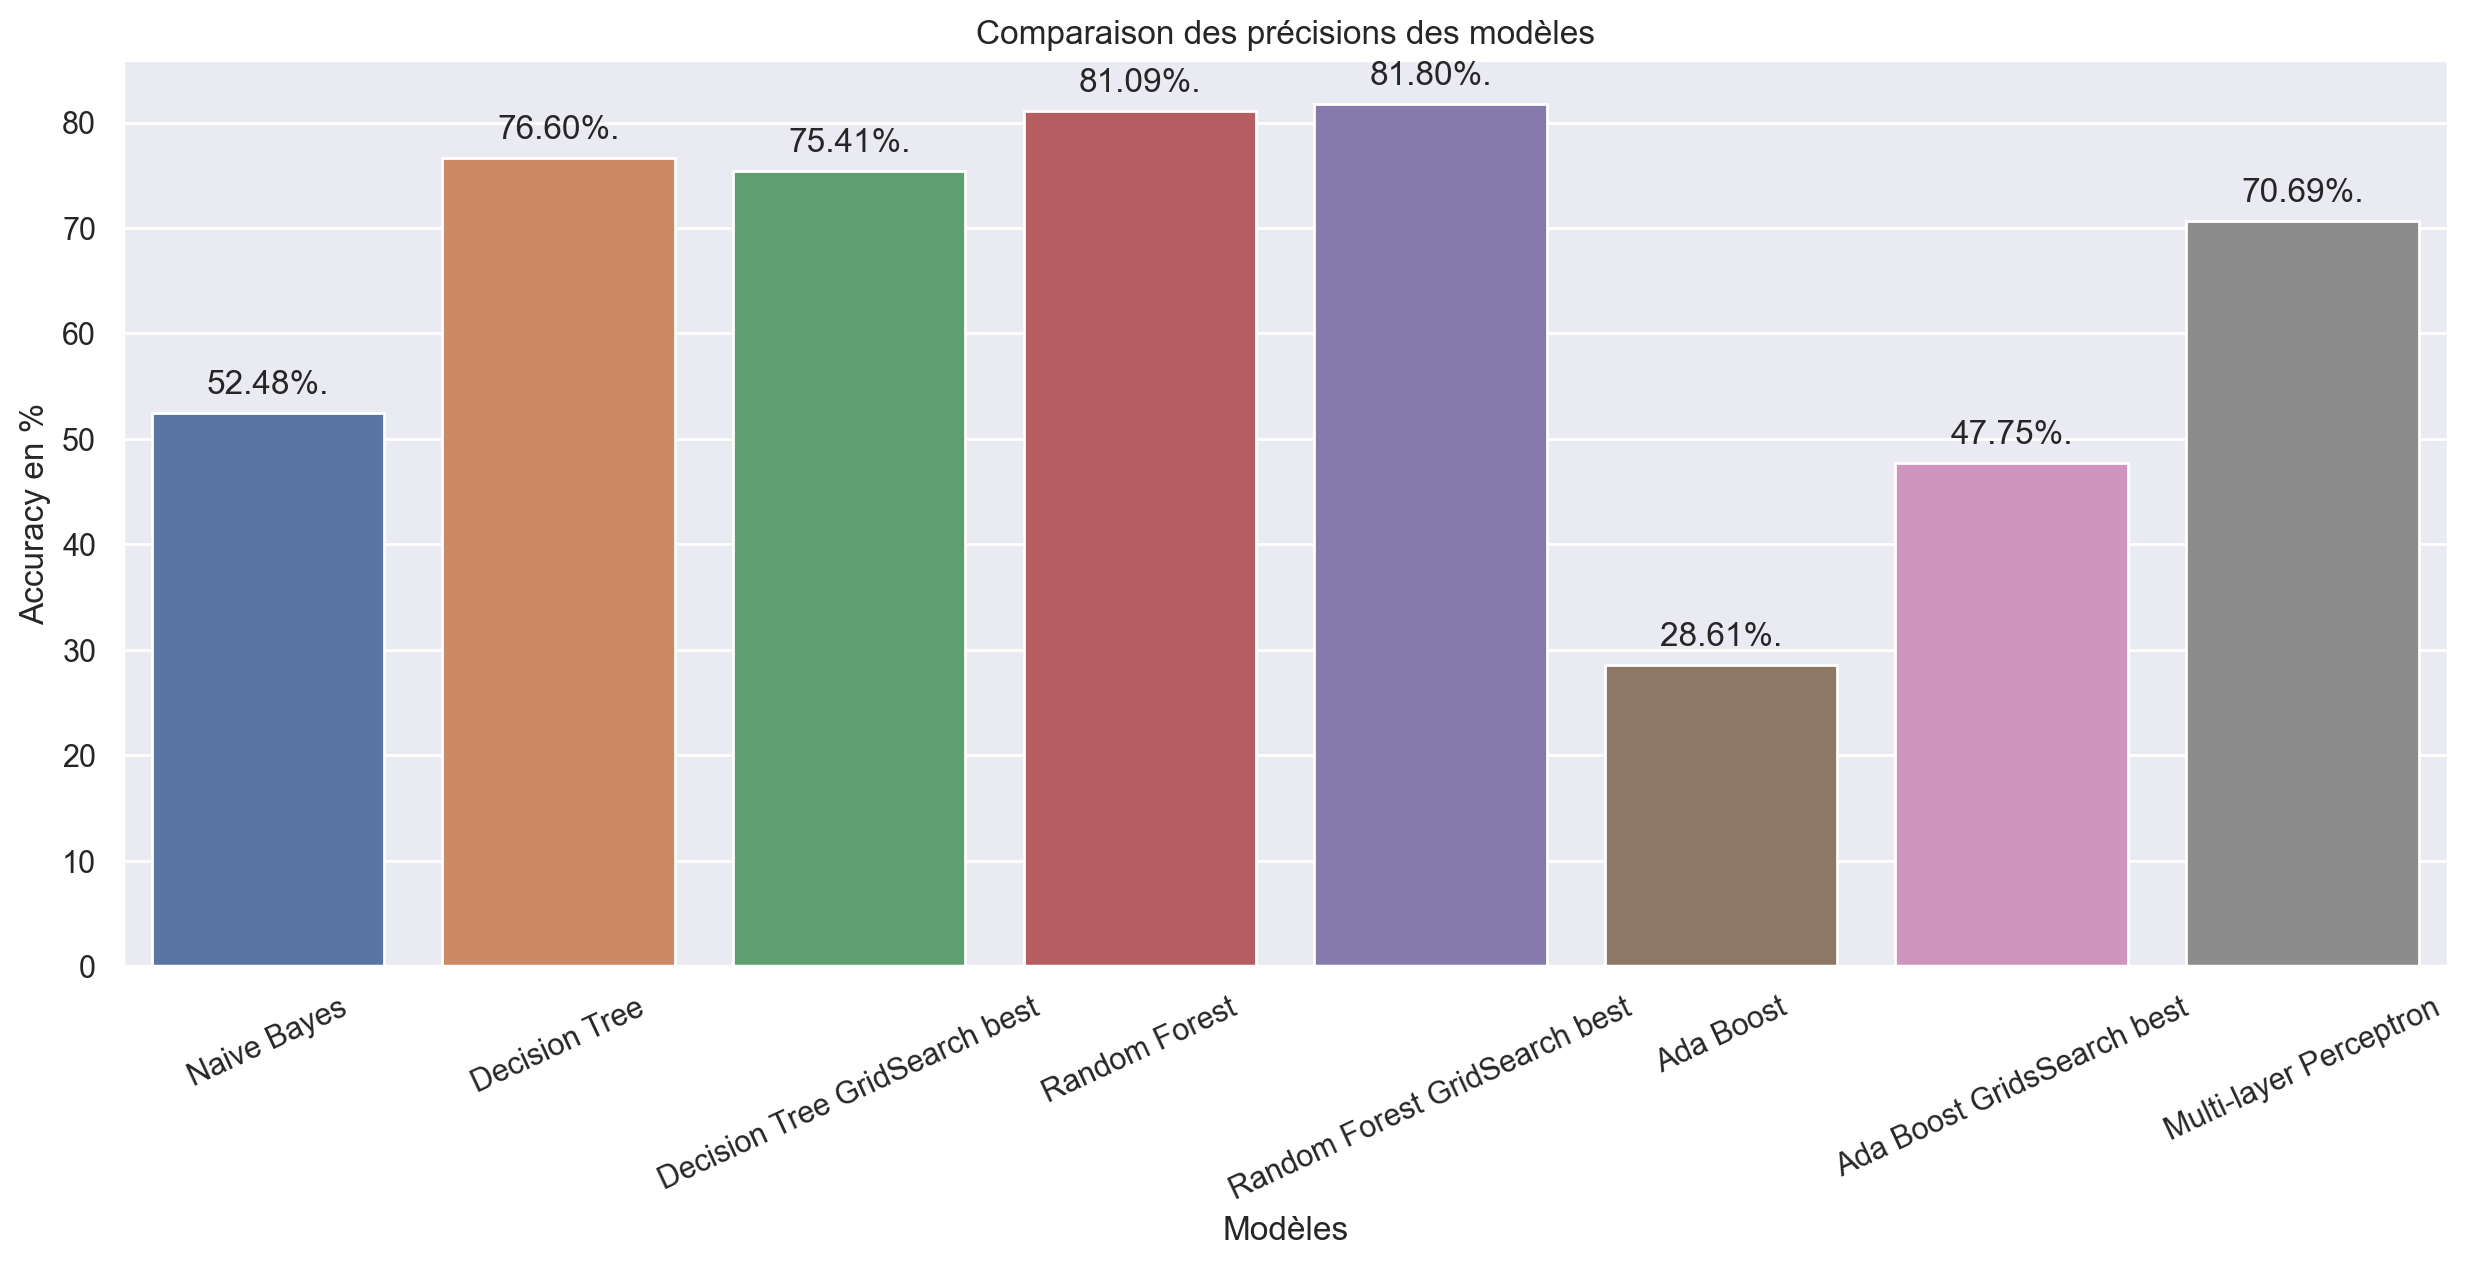

In [96]:
ax = sns.barplot(x=models, y=accuracies)
ax.set_xticklabels(ax.get_xticklabels(), rotation=25)
for p in ax.patches:
    ax.annotate('{:0.2f}%.'.format(p.get_height()), (p.get_x()+p.get_width()/2., p.get_height()), ha='center',va='center',xytext=(0, 10),textcoords='offset points')
    
plt.title('Comparaison des précisions des modèles')
plt.xlabel("Modèles")
plt.ylabel("Accuracy en %")


Le modèle de prédiction créé avec Random Forest est donc celui le plus à même de donner les résultats escomptés. C'est donc ce modèle que nous validons et utiliserons pour notre API.

Text(0.5, 1.0, 'Matrice de confusion de Random Forest')

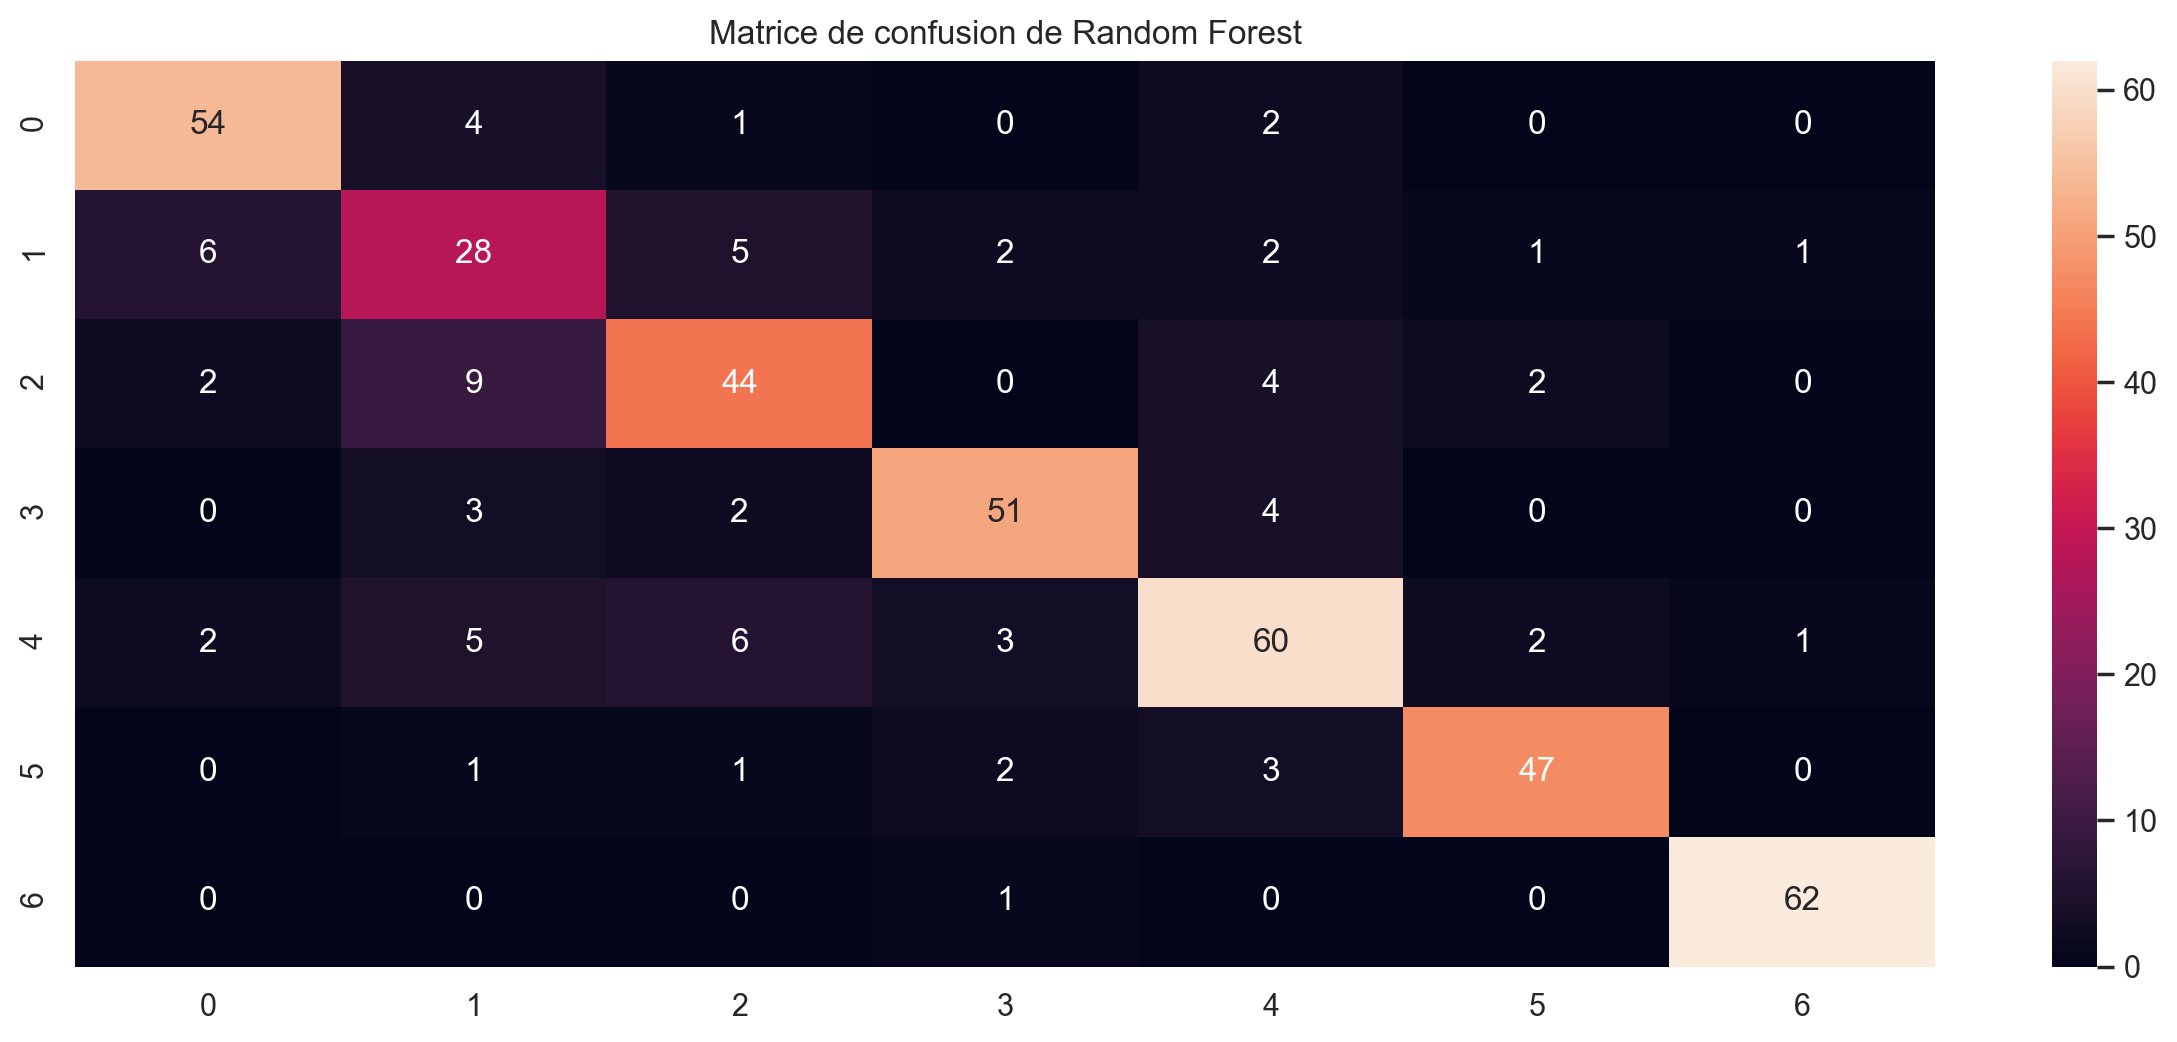

In [107]:
sns.heatmap(confusion_matrix(ytest,grid_forest_pred),annot=True)
plt.title("Matrice de confusion de Random Forest")

## API

Nous enregistrons donc le modèle Randon Forest avec les meilleurs résultats trouvé à l'aide du Grid Search.

In [109]:
import pickle
pickle.dump(grid_forest.best_estimator_, open('API/models/RandomForest_model.pickle', 'wb'))